In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/aerofit-treadmill-data/aerofit_treadmill_data.csv


# Introductory Information

## Assignment
The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.

Perform descriptive analytics to create a customer profile for each AeroFit treadmill product by developing appropriate tables and charts. For each AeroFit treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business.

## Product Portfolio:

The KP281 is an entry-level treadmill that sells for $1,500;
The KP481 is for mid-level runners and sells for $1,750;
The KP781 treadmill is having advanced features and it sells for $2,500.

## Data Description
The company collected data on individuals who purchased a treadmill from the AeroFit stores during the prior three months. The dataset in aerofit_treadmill_data.csv has the following features:

* Product - product purchased: KP281, KP481, or KP781
* Age - in years
* Gender - male/female
* Education - in years
* MaritalStatus - single or partnered
* Usage - the average number of times the customer plans to use the treadmill each week
* Fitness - self-rated fitness on a 1-5 scale, where 1 is the poor shape and 5 is the excellent shape
* Income - annual income in US dollars\
* Miles - the average number of miles the customer expects to walk/run each week

## Practicalities
Analyze the provided data and provide insights to the best of your abilities. Include the relevant tables/graphs/visualization to explain what you have learned about the market. Make sure that the solution reflects your entire thought process including the preparation of data - it is more important how the code is structured rather than just the final result or plot.

# Data Load and Basic Inspections
* No null values found
* 180 records in total with 9 columns
    * 3 unique products within the dataset
    * KP281 is the most frequent product within the dataset
    * Gender is larger percentage Male with 104 records
    * Marital Status is larger percentage Partnered with 107 records
    * Age ranges from 18 to 50 with average of 28.79. 75% of participants are 33 years old or younger
    * Education is 16 years for 75% of participants
    * Standard Deviation for Income and Miles are very large, indicating possible outliers in the data set
* All numeric columns are at least moderately skewed

## Imports

In [2]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

In [3]:
data_df = pd.read_csv('/kaggle/input/aerofit-treadmill-data/aerofit_treadmill_data.csv')

## Dataset Inspections (Level 1)

In [4]:
#Initial Data Inspection

# data_df.head()
# data_df.tail()
# data_df.shape
# data_df.columns
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [5]:
data_df.select_dtypes(exclude='object').skew()

Age          0.982161
Education    0.622294
Usage        0.739494
Fitness      0.454800
Income       1.291785
Miles        1.724497
dtype: float64

In [6]:
data_df.describe(include = 'all')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,KP281,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


In [7]:
#Checking for Nulls
data_df.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [8]:
#Checking for duplicates
data_df.duplicated(subset=None, keep='first').sum()

0

## Variable Investigations (Level 2)

In [9]:
data_df.Product.value_counts()

Product
KP281    80
KP481    60
KP781    40
Name: count, dtype: int64

In [10]:
data_df.Gender.value_counts()

Gender
Male      104
Female     76
Name: count, dtype: int64

In [11]:
data_df.MaritalStatus.value_counts()

MaritalStatus
Partnered    107
Single        73
Name: count, dtype: int64

In [12]:
data_df.nunique()

Product           3
Age              32
Gender            2
Education         8
MaritalStatus     2
Usage             6
Fitness           5
Income           62
Miles            37
dtype: int64

In [13]:
data_df.Age.unique()

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 43, 44, 46, 47, 50, 45, 48, 42])

In [14]:
data_df.Education.unique()

array([14, 15, 12, 13, 16, 18, 20, 21])

In [15]:
data_df.Income.unique()

array([ 29562,  31836,  30699,  32973,  35247,  37521,  36384,  38658,
        40932,  34110,  39795,  42069,  44343,  45480,  46617,  48891,
        53439,  43206,  52302,  51165,  50028,  54576,  68220,  55713,
        60261,  67083,  56850,  59124,  61398,  57987,  64809,  47754,
        65220,  62535,  48658,  54781,  48556,  58516,  53536,  61006,
        57271,  52291,  49801,  62251,  64741,  70966,  75946,  74701,
        69721,  83416,  88396,  90886,  92131,  77191,  52290,  85906,
       103336,  99601,  89641,  95866, 104581,  95508])

In [16]:
data_df.Fitness.value_counts()

Fitness
3    97
5    31
2    26
4    24
1     2
Name: count, dtype: int64

## Adjustment to category fields

In [17]:
#Adjustment to category fields for efficiency of df
data_df['Product'] = data_df.Product.astype('category')
data_df['Gender'] = data_df.Gender.astype('category')
data_df['MaritalStatus'] = data_df.MaritalStatus.astype('category')

# Graphical Dataset Investigation

## Univariate Analysis
* A sizeable subset of purchases are at or near age 23 - 25
* Miles and Income variables show significant outliers and are significantly skewed
* Age, Education and Usage show very few outliers
* Fitness Level 3 makes up a large quantity of treadmill sales
* Majority of customer incomes fall between `40k` - `$60k` range
* Data shows 3 additional volume metrics
    * Partnered > Single
    * Male > Female
    * KP281 > KP481 > KP781

In [18]:
numeric_columns = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']

<Figure size 640x480 with 0 Axes>

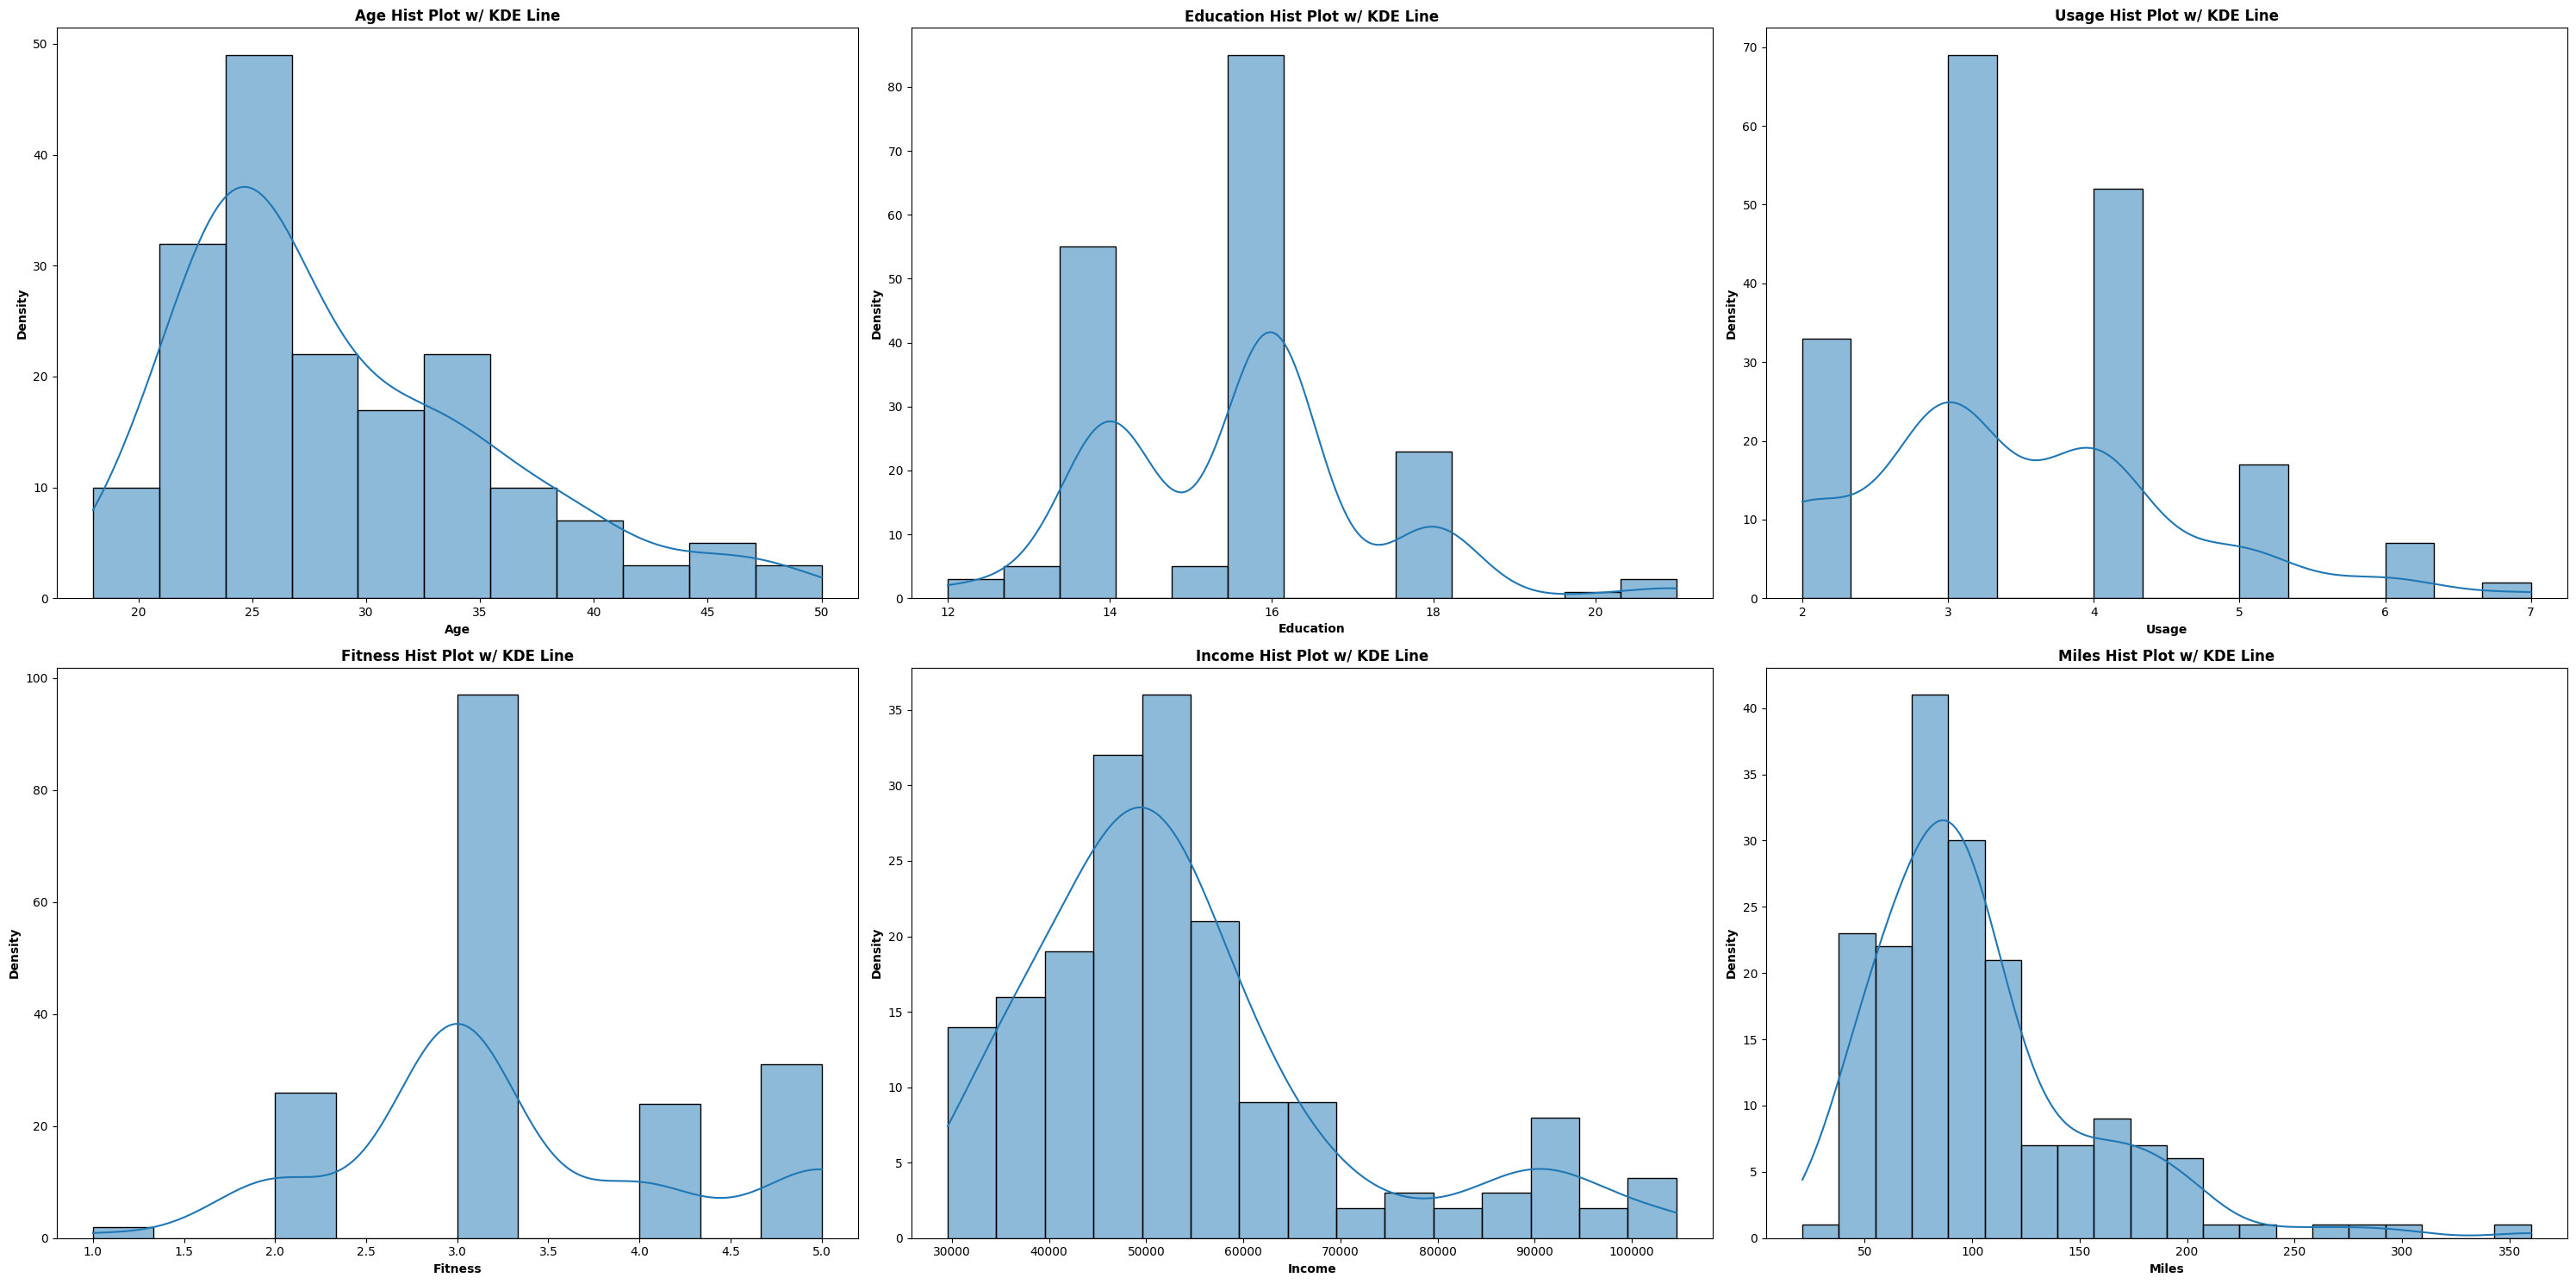

In [19]:
#Histplots for all variables
plt.clf()

fig, axes = plt.subplots(2, 3, figsize=(30, 15))
axes = axes.flatten()

for i, var in enumerate(numeric_columns):
    sns.histplot(data=data_df, x=var, kde=True, ax = axes[i])
    axes[i].set_title(var + ' Hist Plot w/ KDE Line', fontweight='bold')
    axes[i].set_ylabel('Density', fontweight='bold')
    axes[i].set_xlabel(var, fontweight='bold')

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

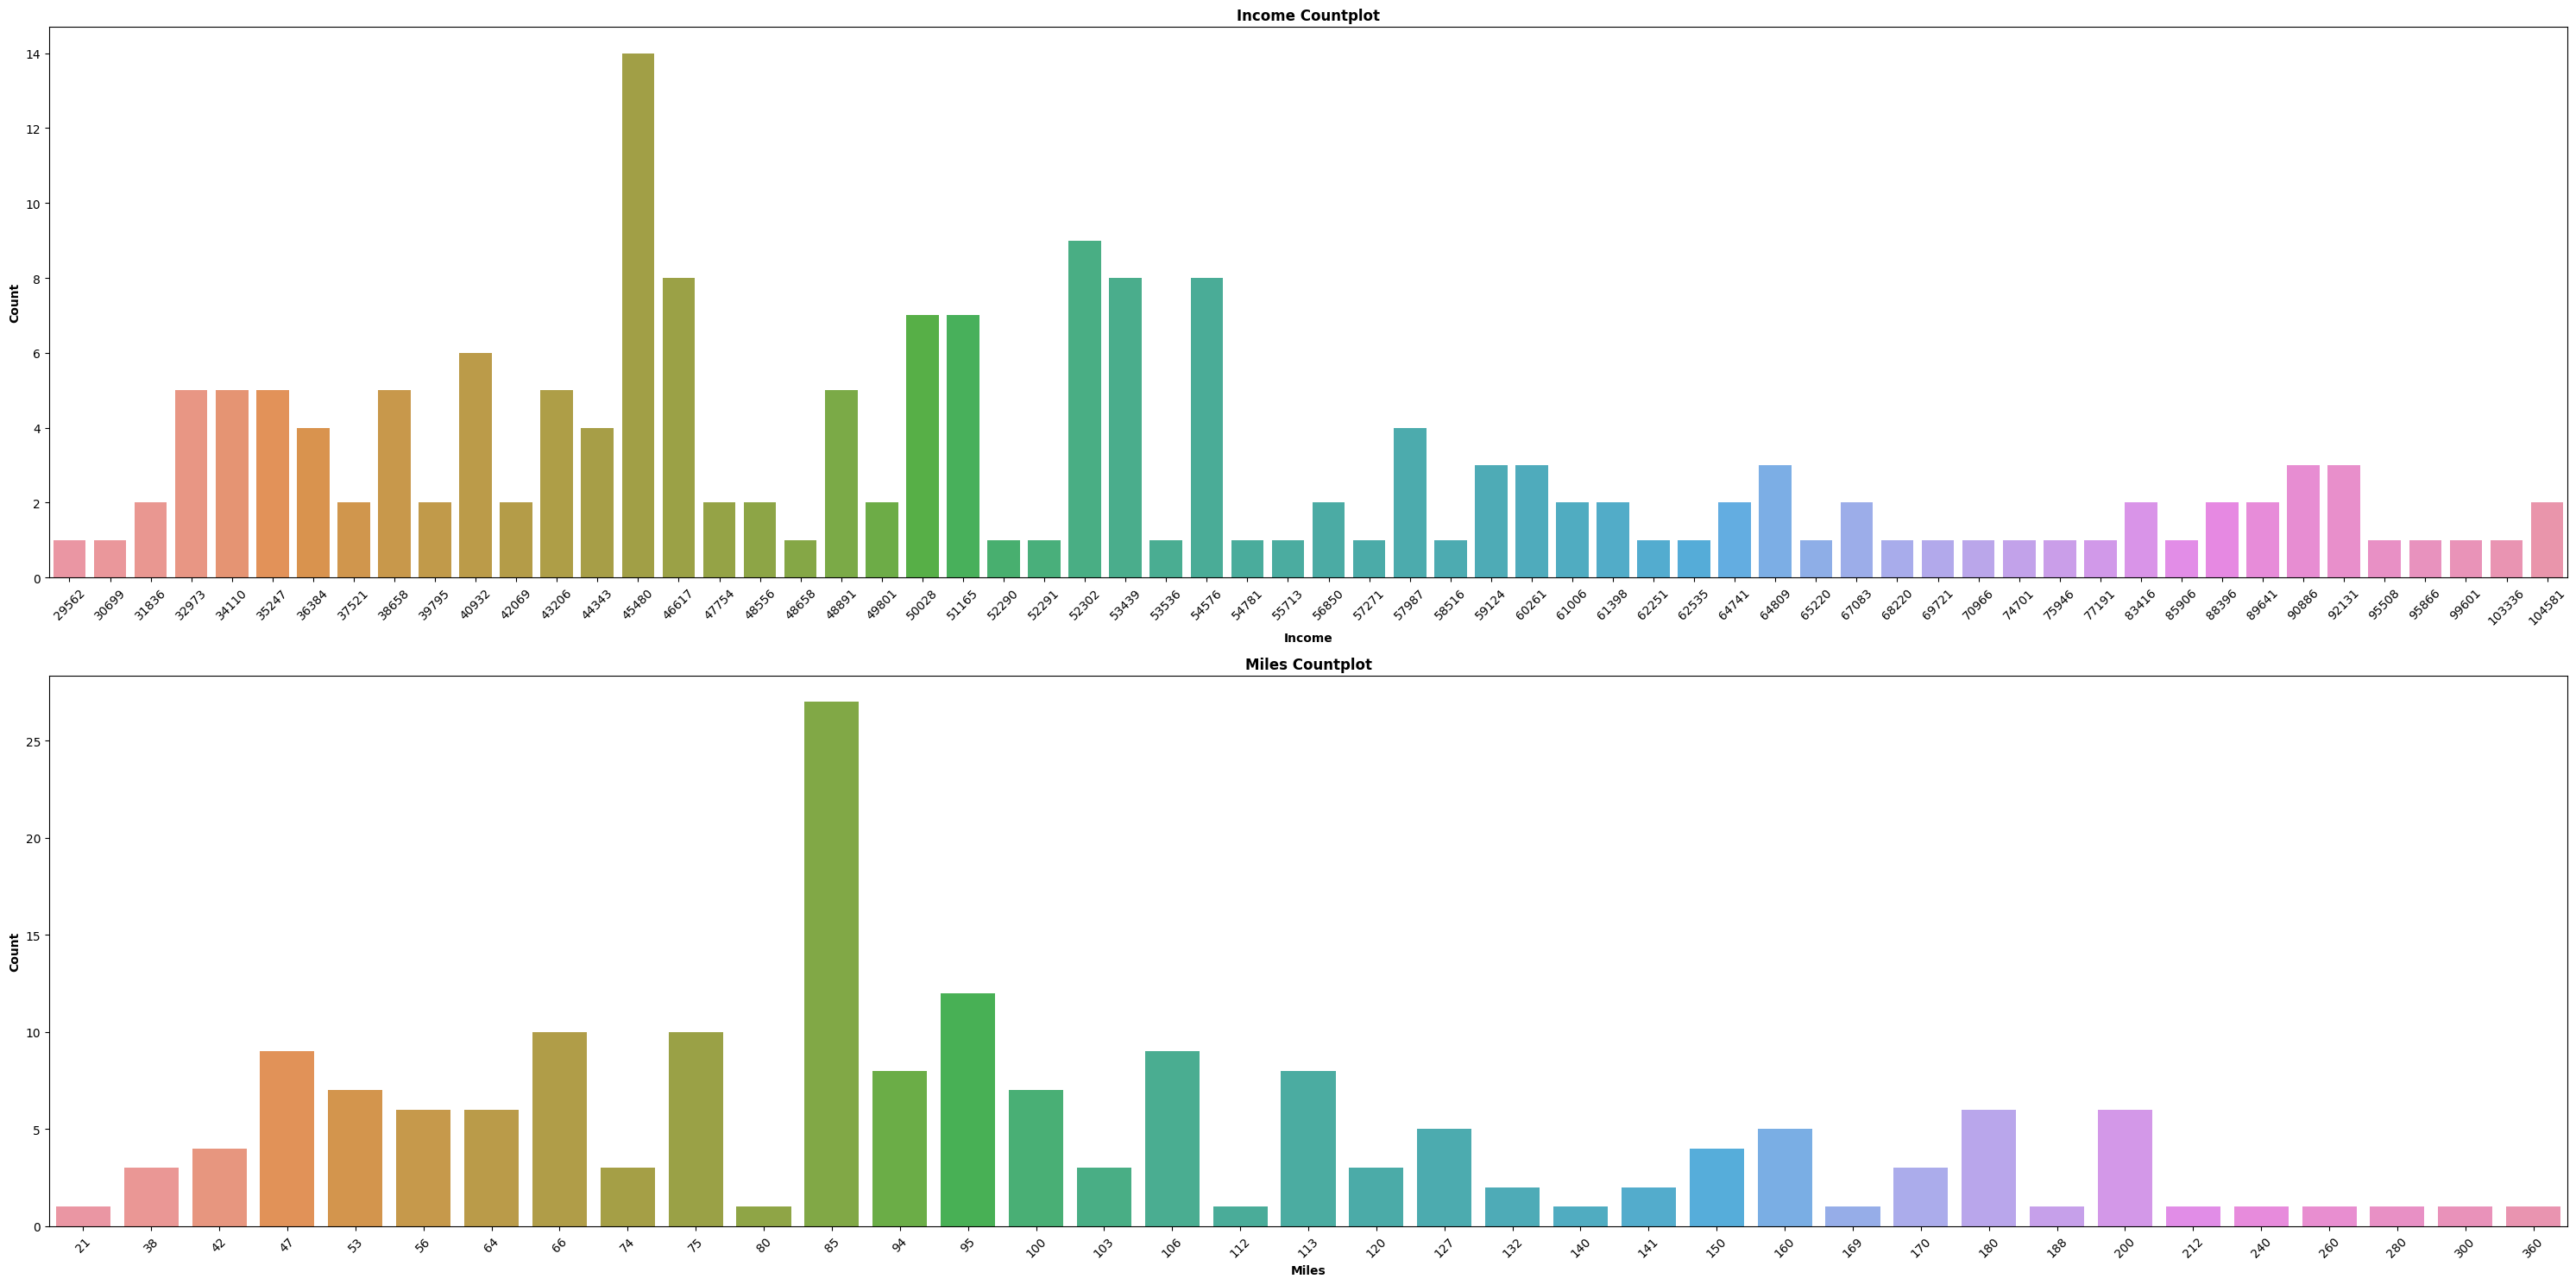

In [20]:
#Countplots for Income and Miles

plt.clf()

fig, axes = plt.subplots(2,1,figsize=(30, 15))
axes = axes.flatten()

sns.color_palette('cubehelix', as_cmap=True)

sns.countplot(data_df, x='Income', ax=axes[0])
axes[0].set_title('Income Countplot', fontweight='bold')
axes[0].set_ylabel('Count', fontweight='bold')
axes[0].set_xlabel('Income', fontweight='bold')
axes[0].tick_params(axis='x', rotation=45)

sns.countplot(data_df, x='Miles', ax=axes[1])
axes[1].set_title('Miles Countplot', fontweight='bold')
axes[1].set_ylabel('Count', fontweight='bold')
axes[1].set_xlabel('Miles', fontweight='bold')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

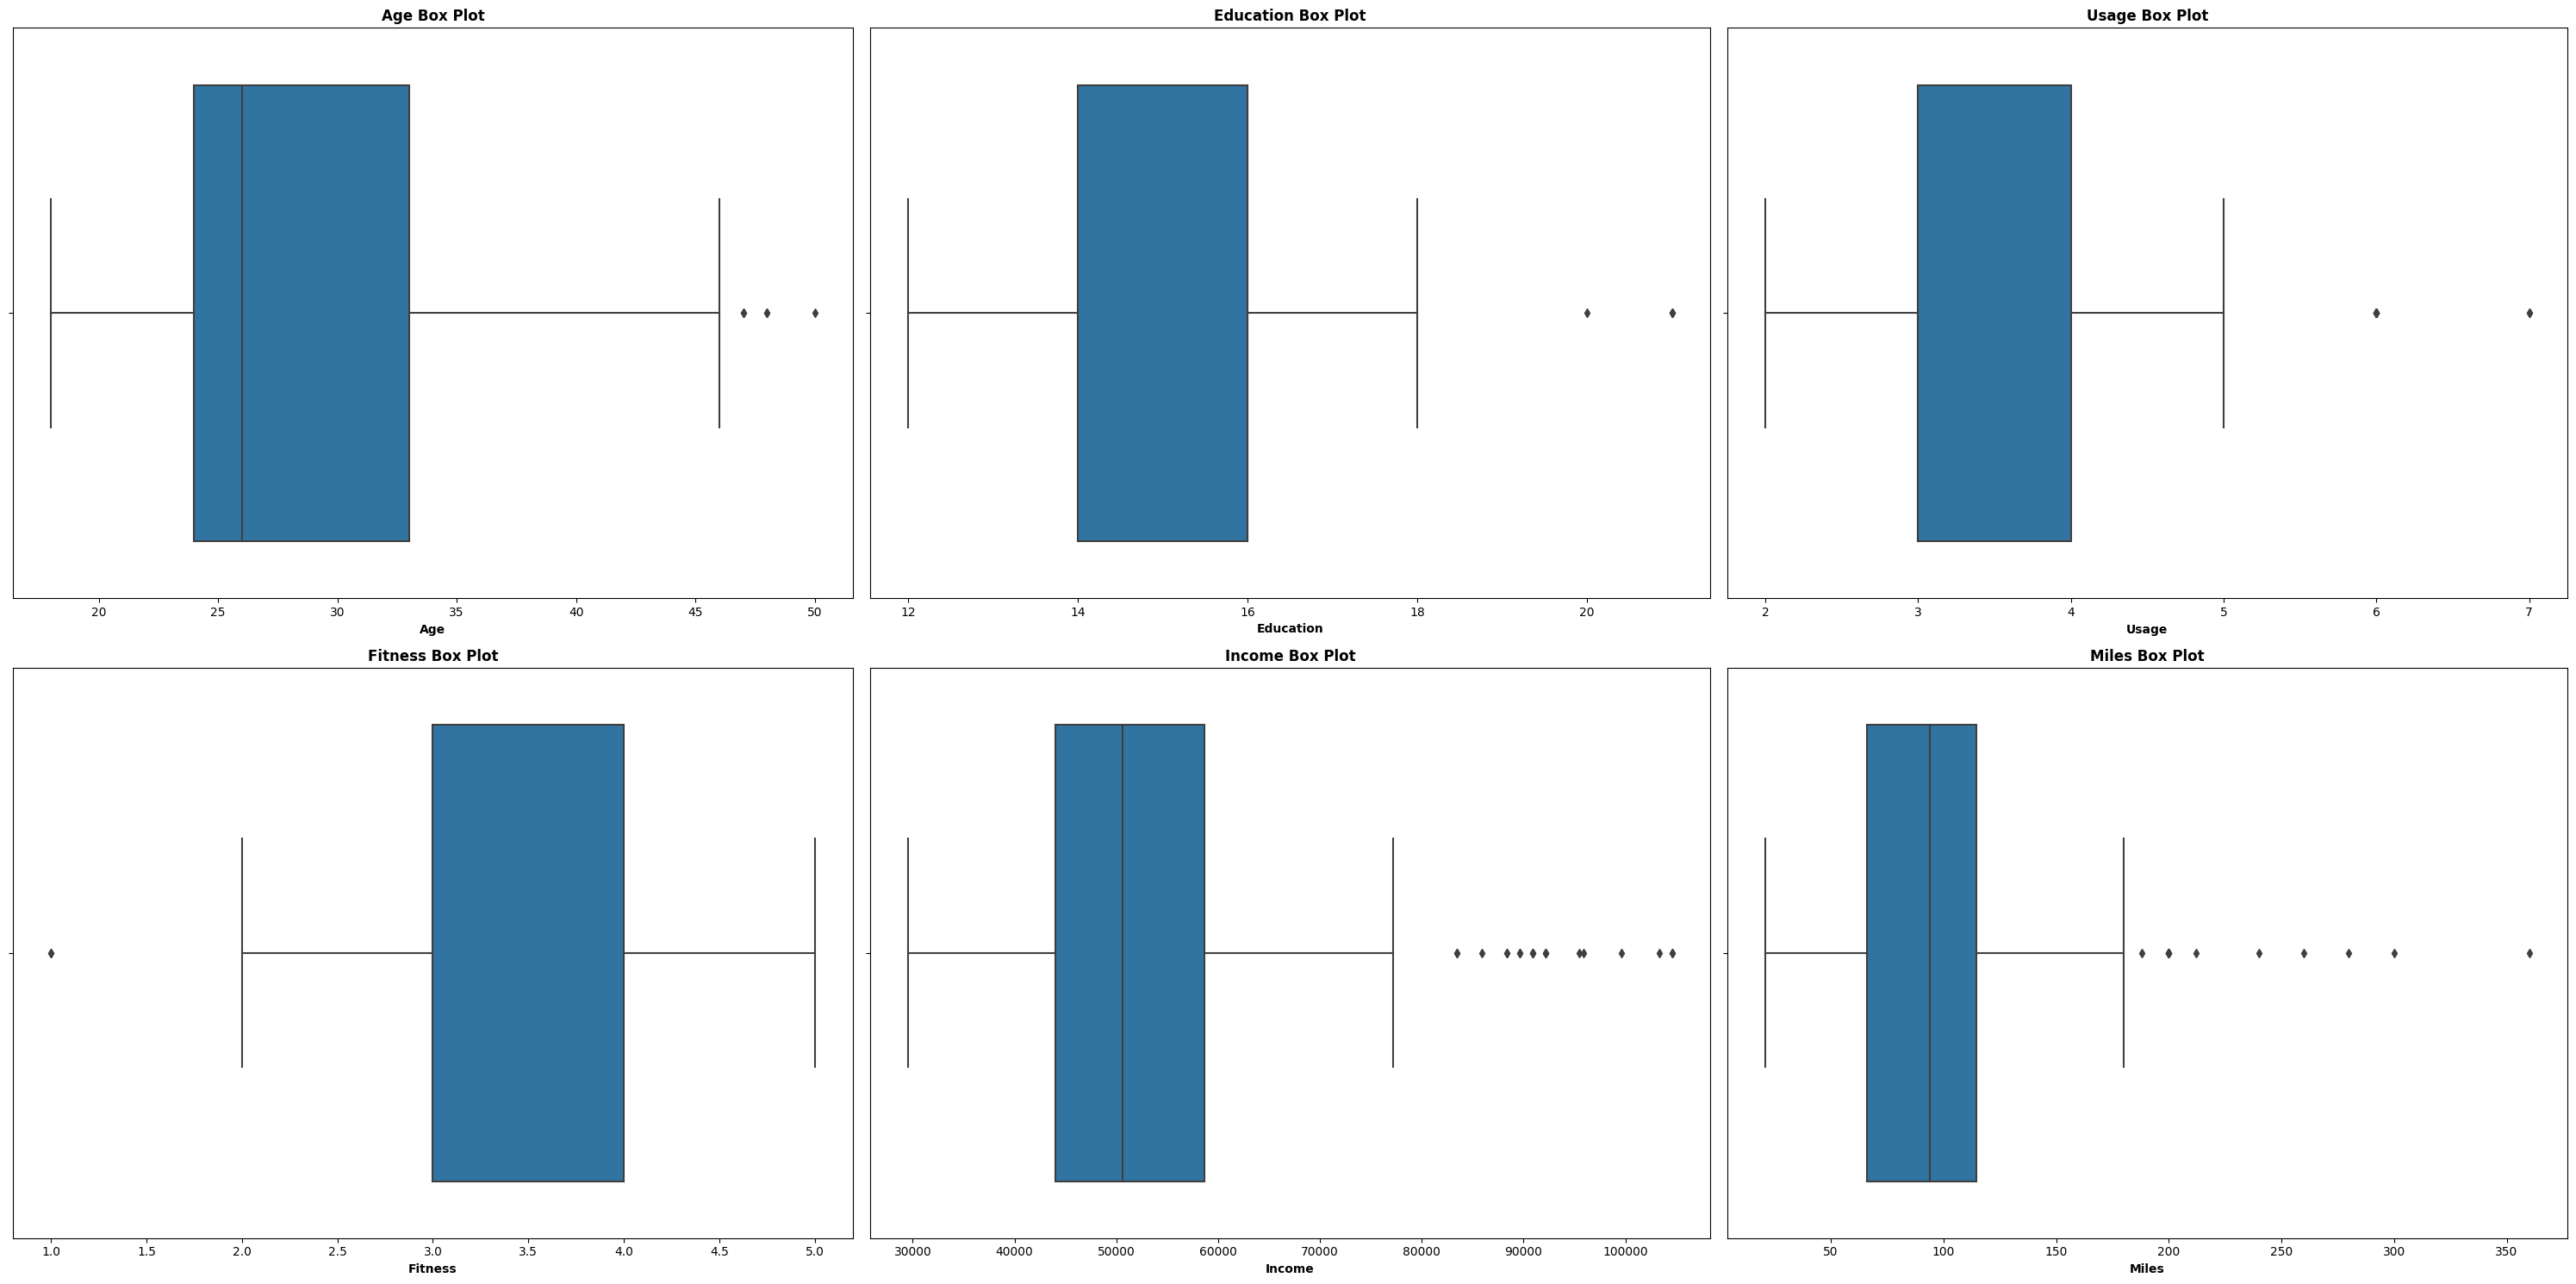

In [21]:
#Box Plots to investigate outliers

plt.clf()

fig, axes = plt.subplots(2, 3, figsize=(30, 15))
axes = axes.flatten()



for i, var in enumerate(numeric_columns):
    sns.boxplot(data_df, x=var, ax=axes[i])
    axes[i].set_title(var + ' Box Plot', fontweight='bold')
    axes[i].set_xlabel(var, fontweight='bold')

plt.tight_layout()
plt.show()

In [22]:
#Categorical Variables
categoric_columns = data_df.select_dtypes(include='category')
categoric_columns.columns

Index(['Product', 'Gender', 'MaritalStatus'], dtype='object')

<Figure size 640x480 with 0 Axes>

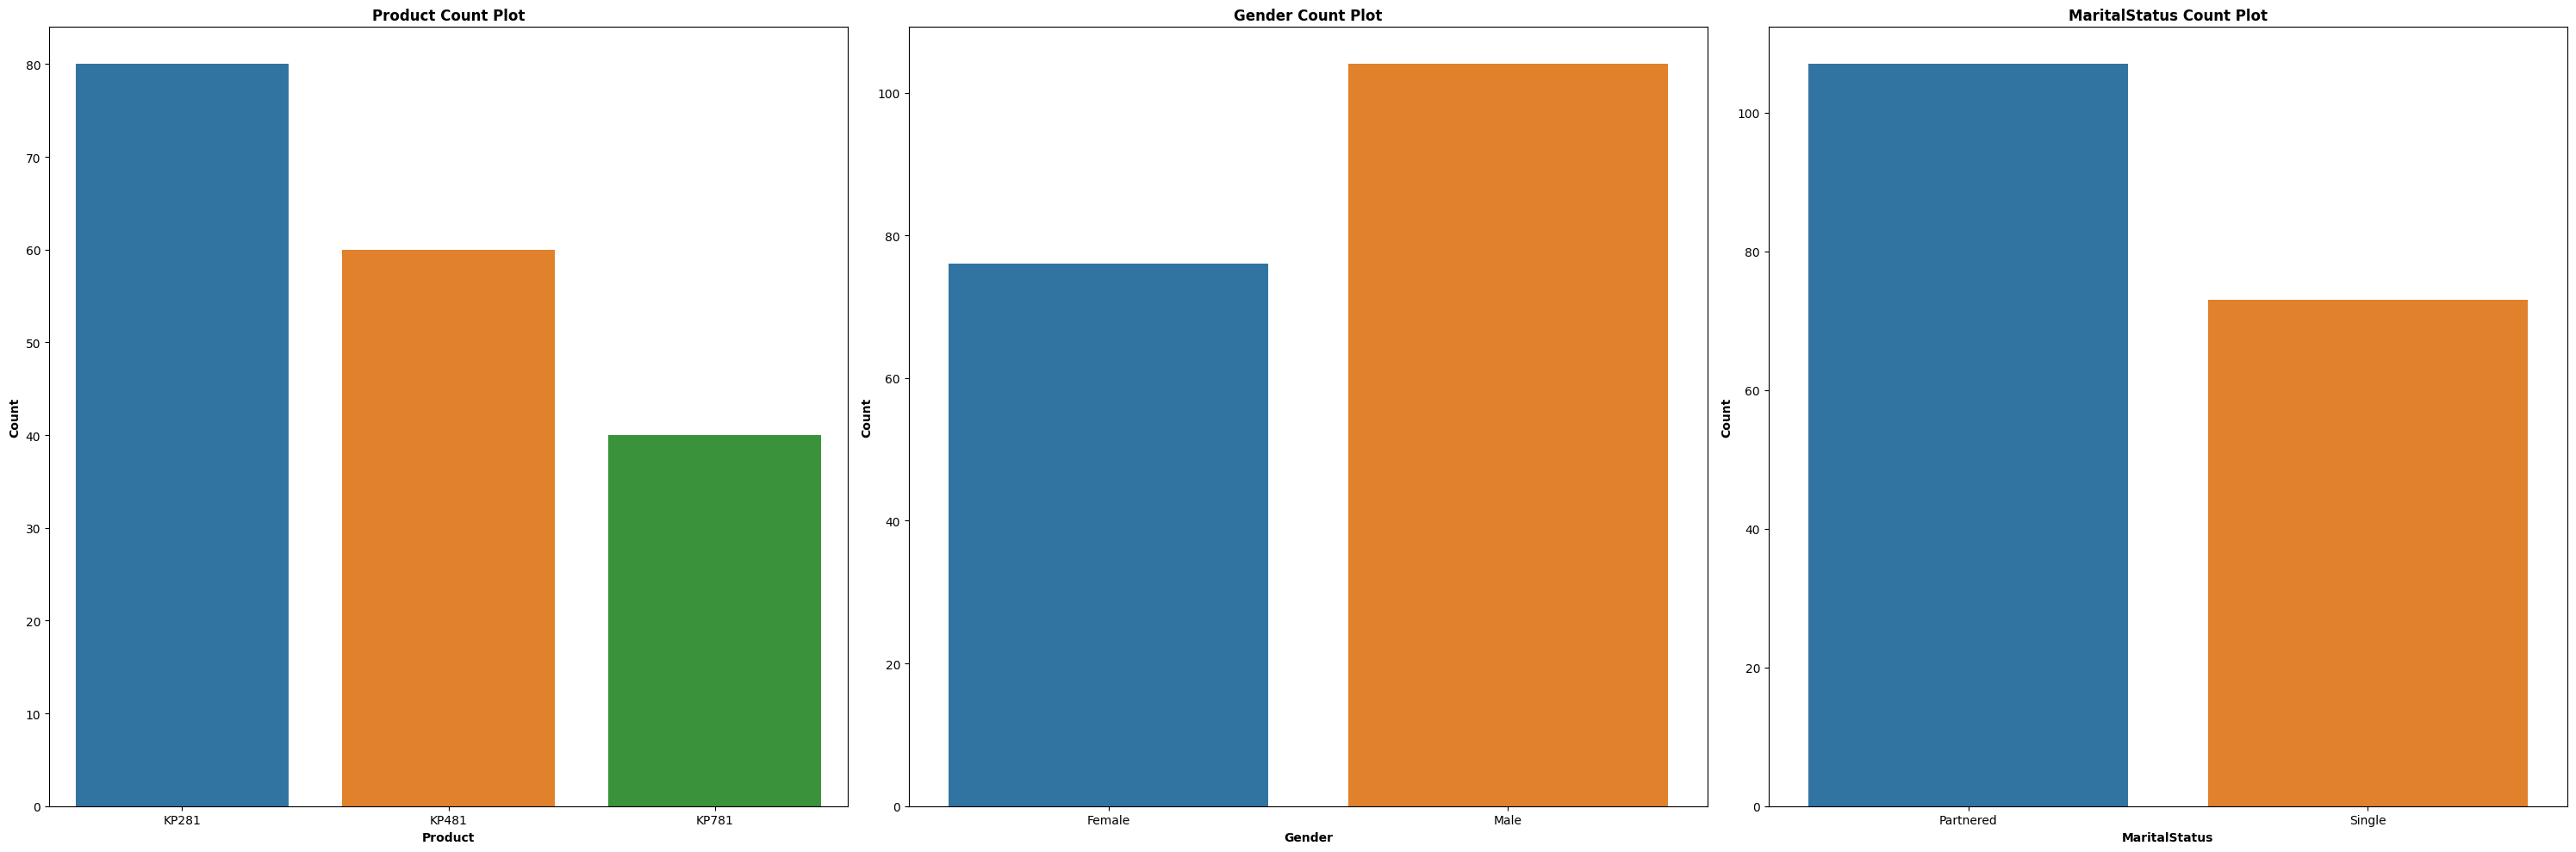

In [23]:
plt.clf()

fig, axes = plt.subplots(1, 3, figsize=(30, 10))
axes = axes.flatten()

for i, var in enumerate(categoric_columns):
    sns.countplot(data_df, x=var, ax=axes[i])
    axes[i].set_title(var + ' Count Plot', fontweight='bold')
    axes[i].set_ylabel('Count', fontweight='bold')
    axes[i].set_xlabel(var, fontweight='bold')

plt.tight_layout()
plt.show()

# Graphical Dataset Investigation

## Bivariate Analysis
* Confirming any relationships between product and other parameters

<Figure size 640x480 with 0 Axes>

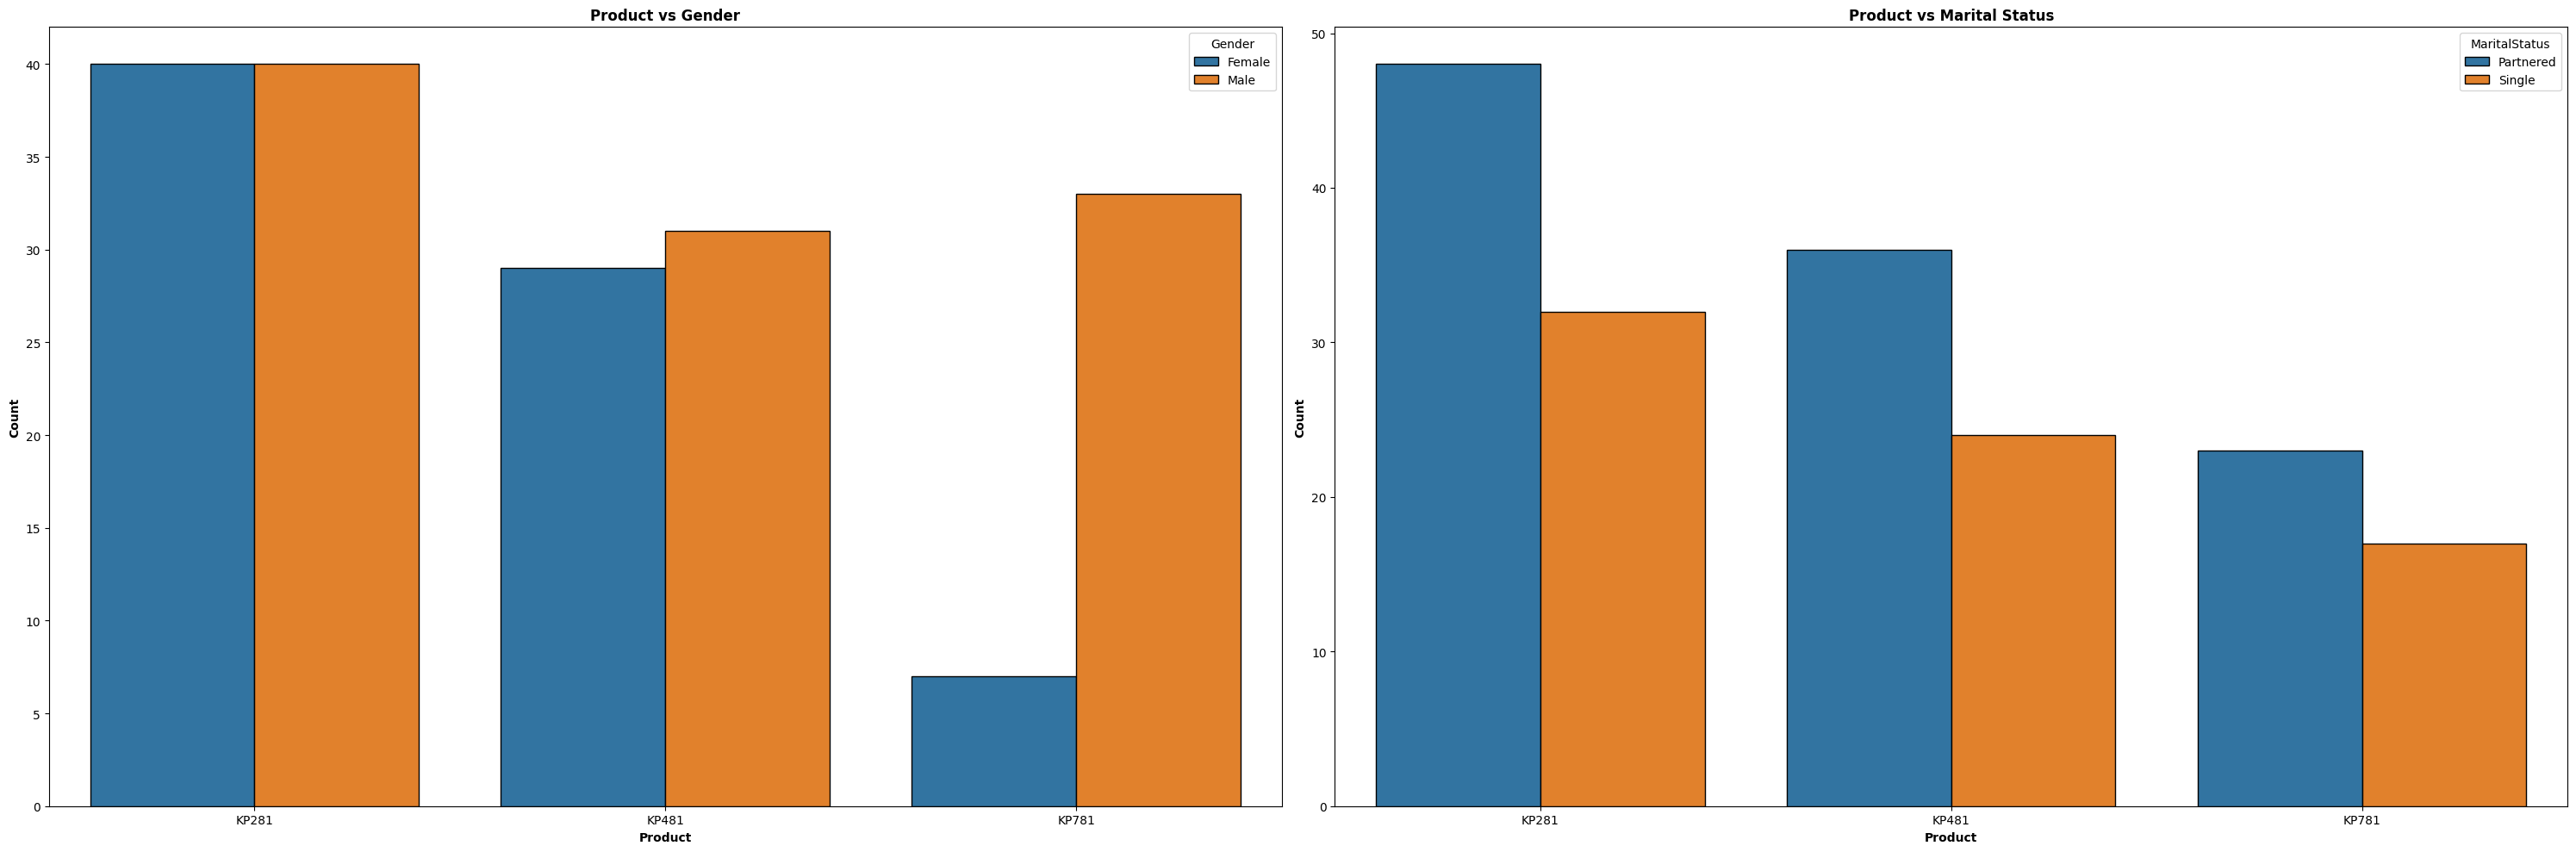

In [24]:
plt.clf()

fig, axes = plt.subplots(1, 2, figsize=(30, 10))
axes = axes.flatten()

sns.countplot(data_df, x='Product', hue='Gender', edgecolor='black', ax=axes[0])
axes[0].set_title('Product vs Gender', fontweight='bold')
axes[0].set_xlabel('Product', fontweight='bold')
axes[0].set_ylabel('Count', fontweight='bold')

sns.countplot(data_df, x='Product', hue='MaritalStatus', edgecolor='black', ax=axes[1])
axes[1].set_title('Product vs Marital Status', fontweight='bold')
axes[1].set_xlabel('Product', fontweight='bold')
axes[1].set_ylabel('Count', fontweight='bold')

plt.tight_layout()
plt.show()

**Observations**
* KP281 and KP481 show equal distribution of Male and Female buyers, but KP781 has a clear advantage with Male buyers
* All products show increased volumes for Partnered buyers

<Figure size 640x480 with 0 Axes>

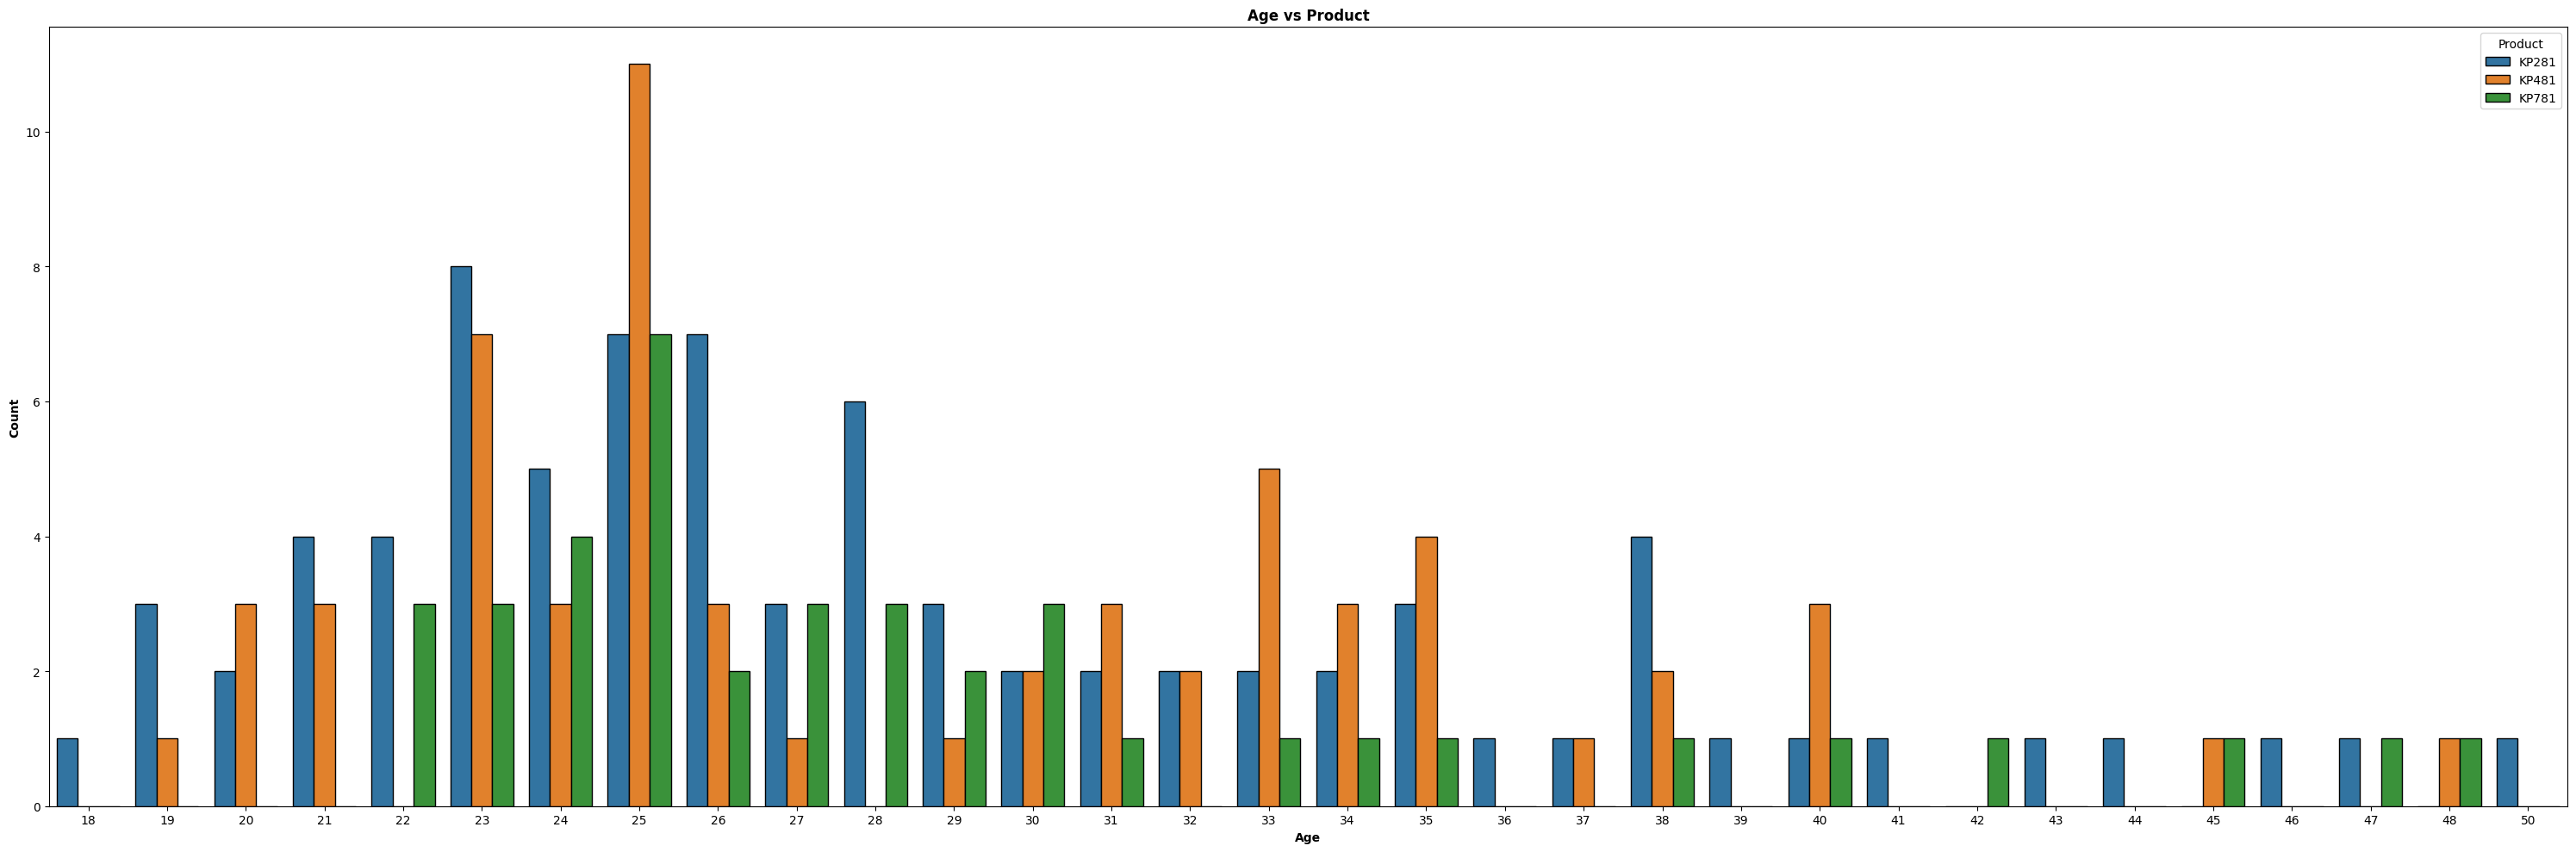

In [77]:
plt.clf()

fig, axes = plt.subplots(1, 1, figsize=(30, 10))

sns.countplot(data_df, x='Age', hue='Product', edgecolor='black')
plt.title('Age vs Product', fontweight='bold')
plt.xlabel('Age', fontweight='bold')
plt.ylabel('Count', fontweight='bold')

plt.tight_layout()
plt.show()

**Observations**
* Product KP481 is most likely to be purchased by customers age 25

<Figure size 640x480 with 0 Axes>

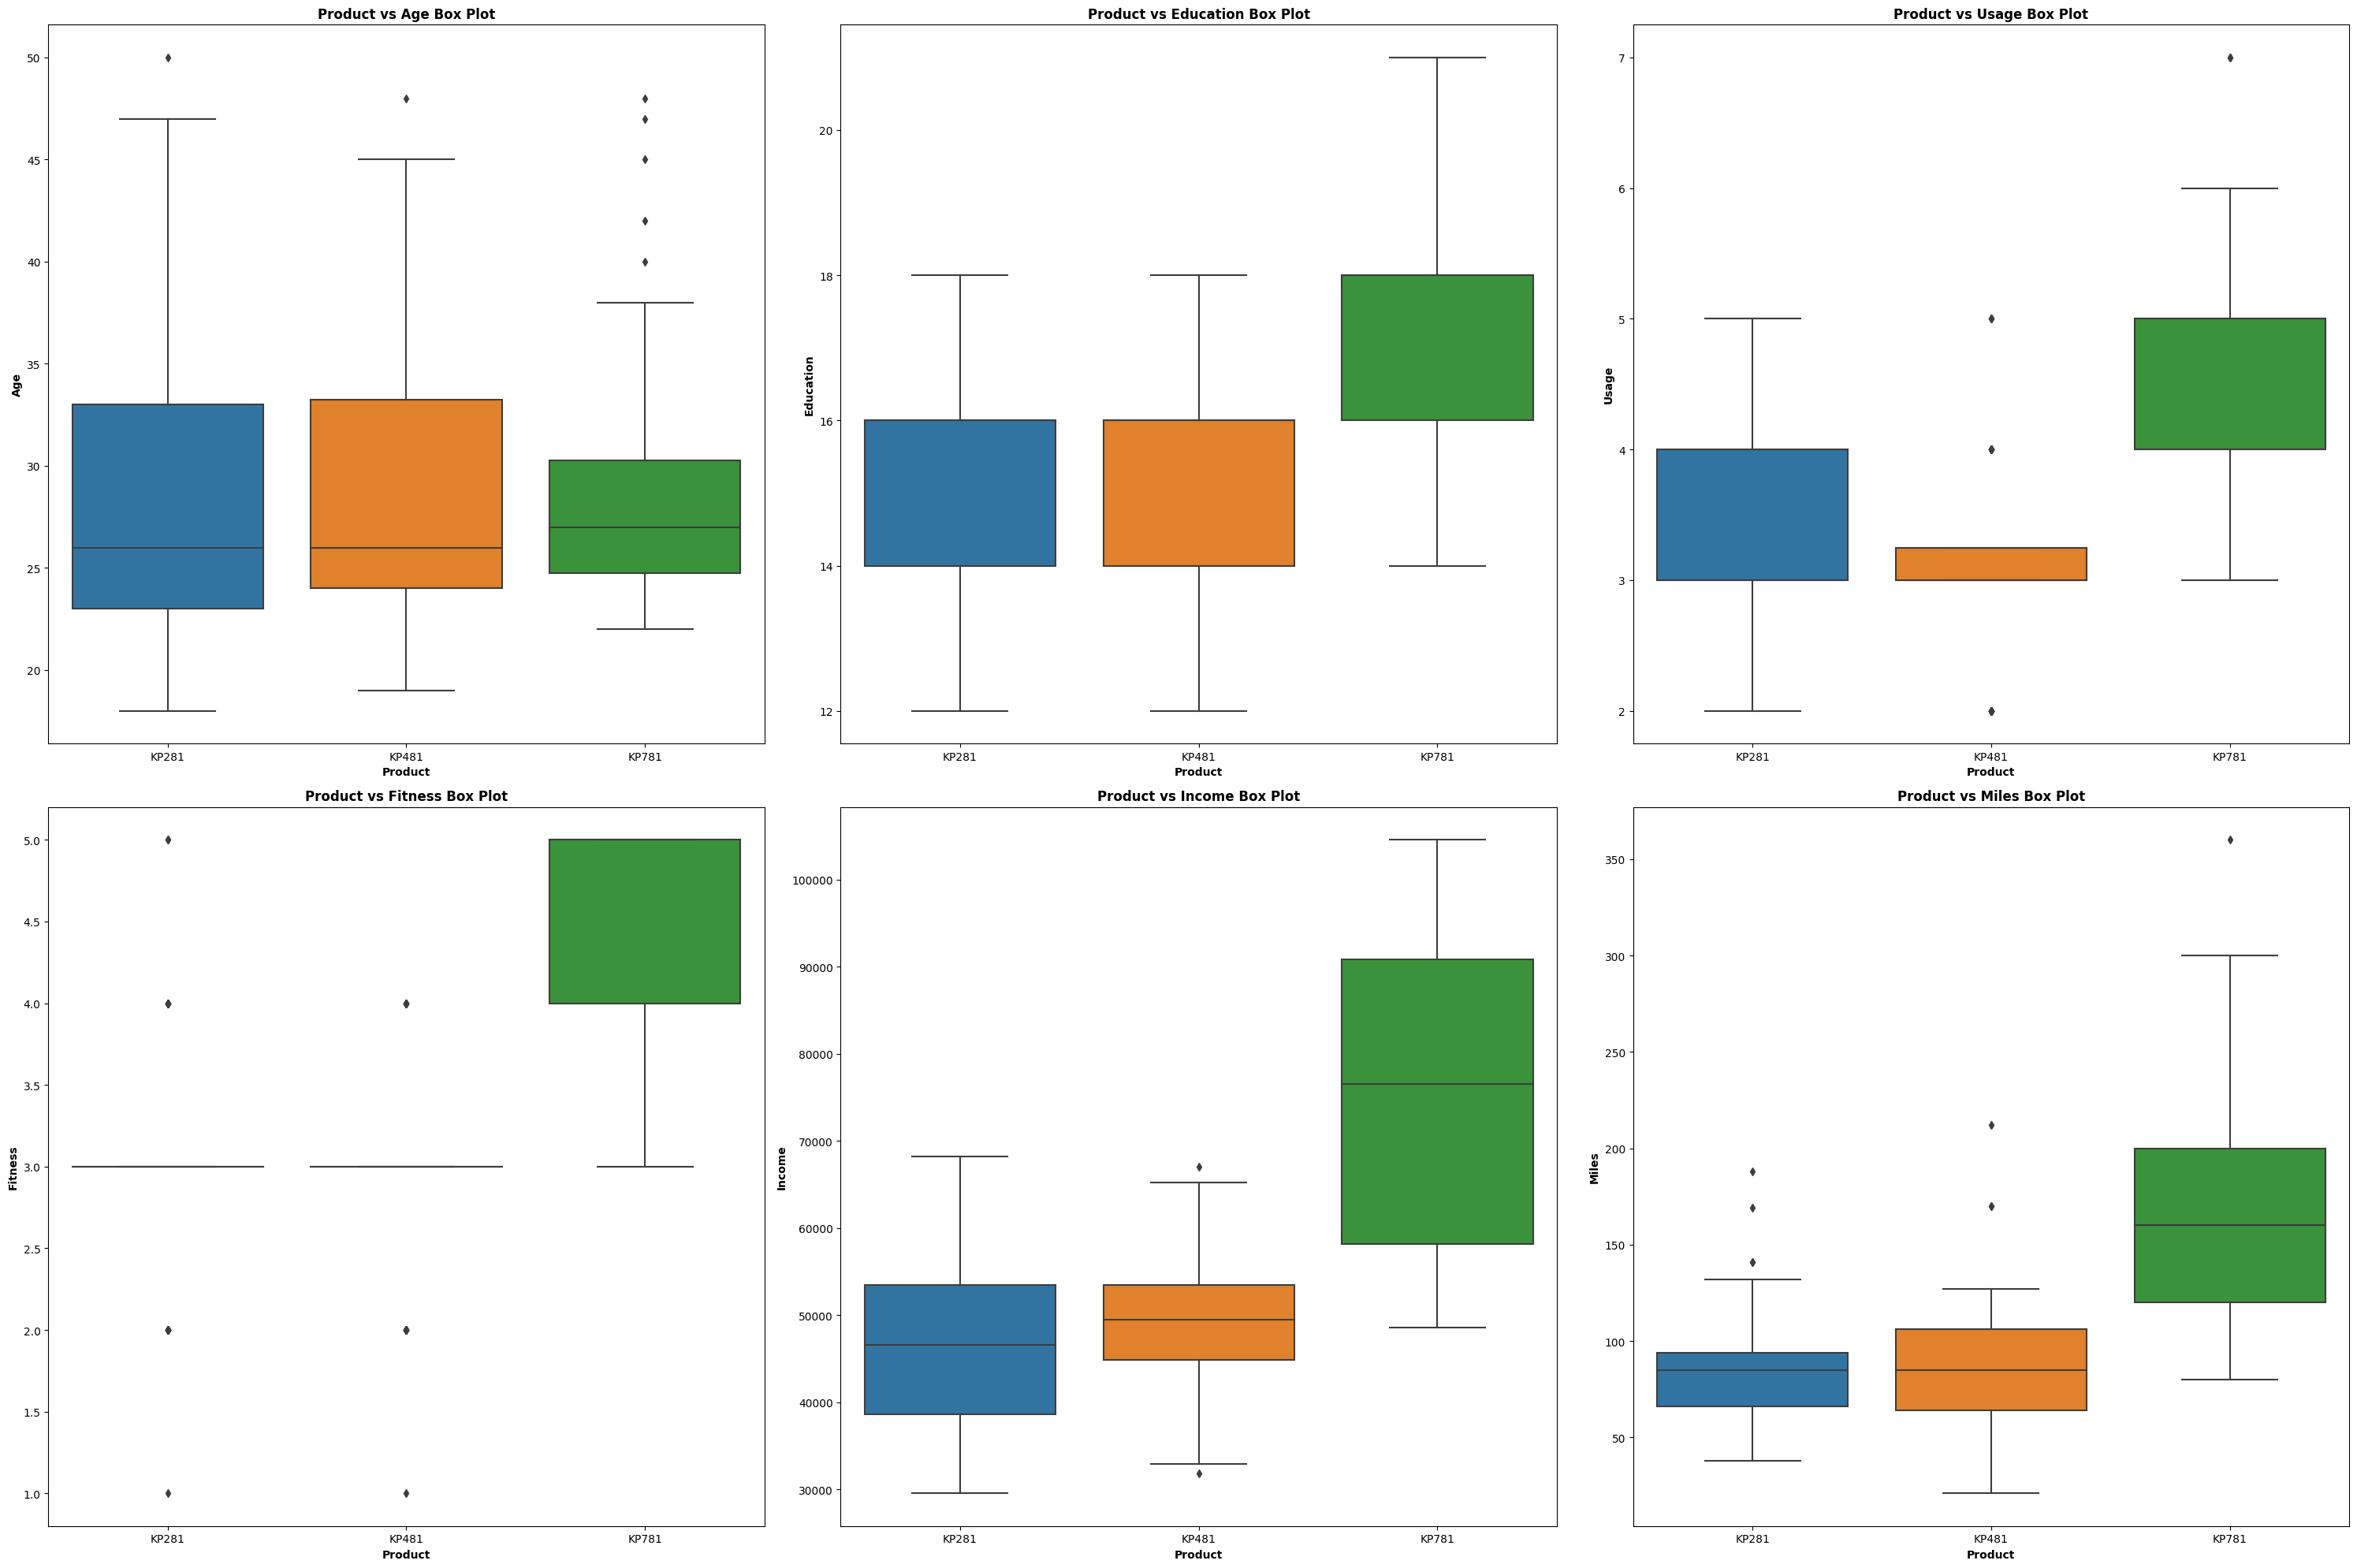

In [26]:
plt.clf()

fig, axes = plt.subplots(2, 3, figsize=(30, 20))
axes = axes.flatten()

for i, var in enumerate(numeric_columns):
    sns.boxplot(data_df, x='Product', y=var, ax=axes[i])
    axes[i].set_title('Product vs ' + var + ' Box Plot', fontweight='bold')
    axes[i].set_xlabel('Product', fontweight='bold')
    axes[i].set_ylabel(var, fontweight='bold')

plt.tight_layout()
plt.show()

**Observations**
* Product vs Age
    * Product KP281 and KP481 has same Age median value
    * 50% of KP781 sales are by ages 25-30
* Product vs Education
    * Customers with Education less than 16 years are equally likely to purchase KP281 or KP481
    * Customers with Education greater than 16 are most likely to purchase KP781
* Product vs Usage
    * Customers planning to use the treadmill greater than 4 times per week are most likely to purchase KP781
* Product vs Fitness
    * The most fit customers favor KP781
* Product vs Income
    * KP281 shows higher acceptance with low to mid range incomes (< 60,000)
    * KP481 favors higher median income, but still in similar range as KP281
    * KP781 is a clear favorite at higher income levels
* Product vs Miles
    * Customers planning to walk or run 120 miles or more each week are more likely to purchase KP781

## Multivariate Analysis
* Confirming any relationships between product and variable combinations

<Figure size 640x480 with 0 Axes>

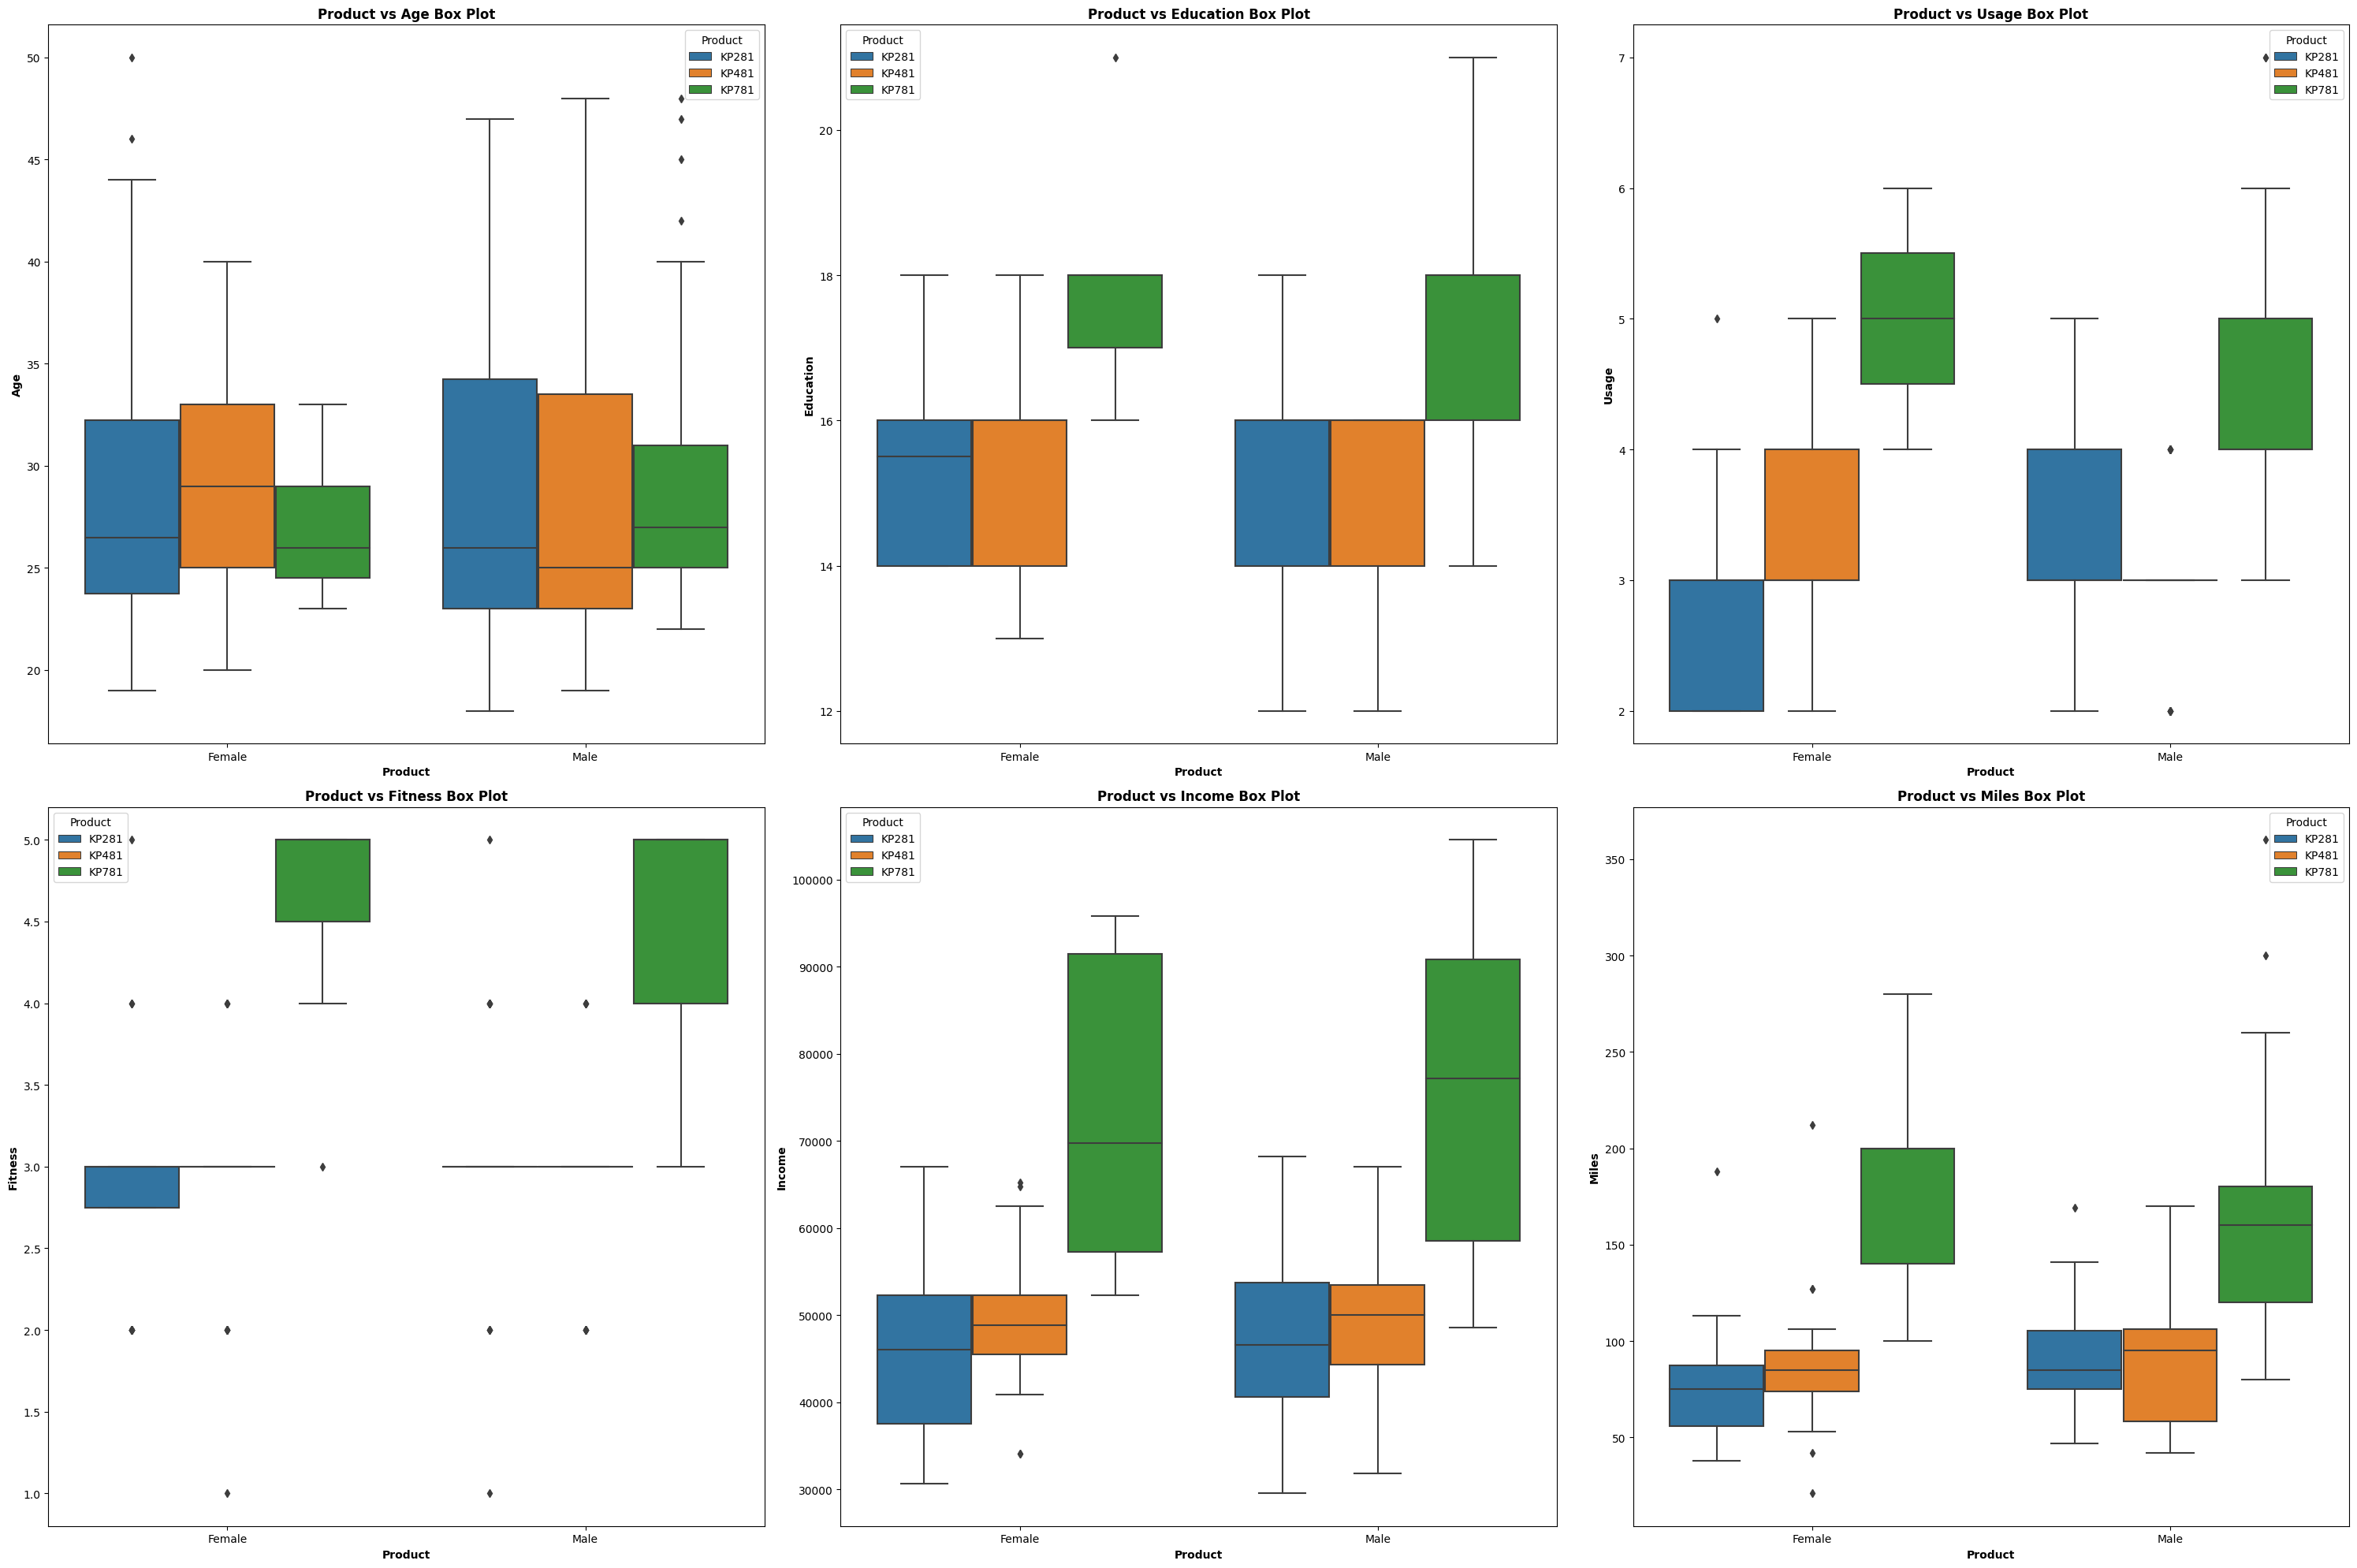

In [27]:
plt.clf()

fig, axes = plt.subplots(2, 3, figsize=(30, 20))
axes = axes.flatten()

for i, var in enumerate(numeric_columns):
    sns.boxplot(data_df, x='Gender', hue='Product', y=var, ax=axes[i])
    axes[i].set_title('Product vs ' + var + ' Box Plot', fontweight='bold')
    axes[i].set_xlabel('Product', fontweight='bold')
    axes[i].set_ylabel(var, fontweight='bold')

plt.tight_layout()
plt.show()

**Observations**
* Female buyers planning on 3-4 uses per week favor KP481

<Figure size 640x480 with 0 Axes>

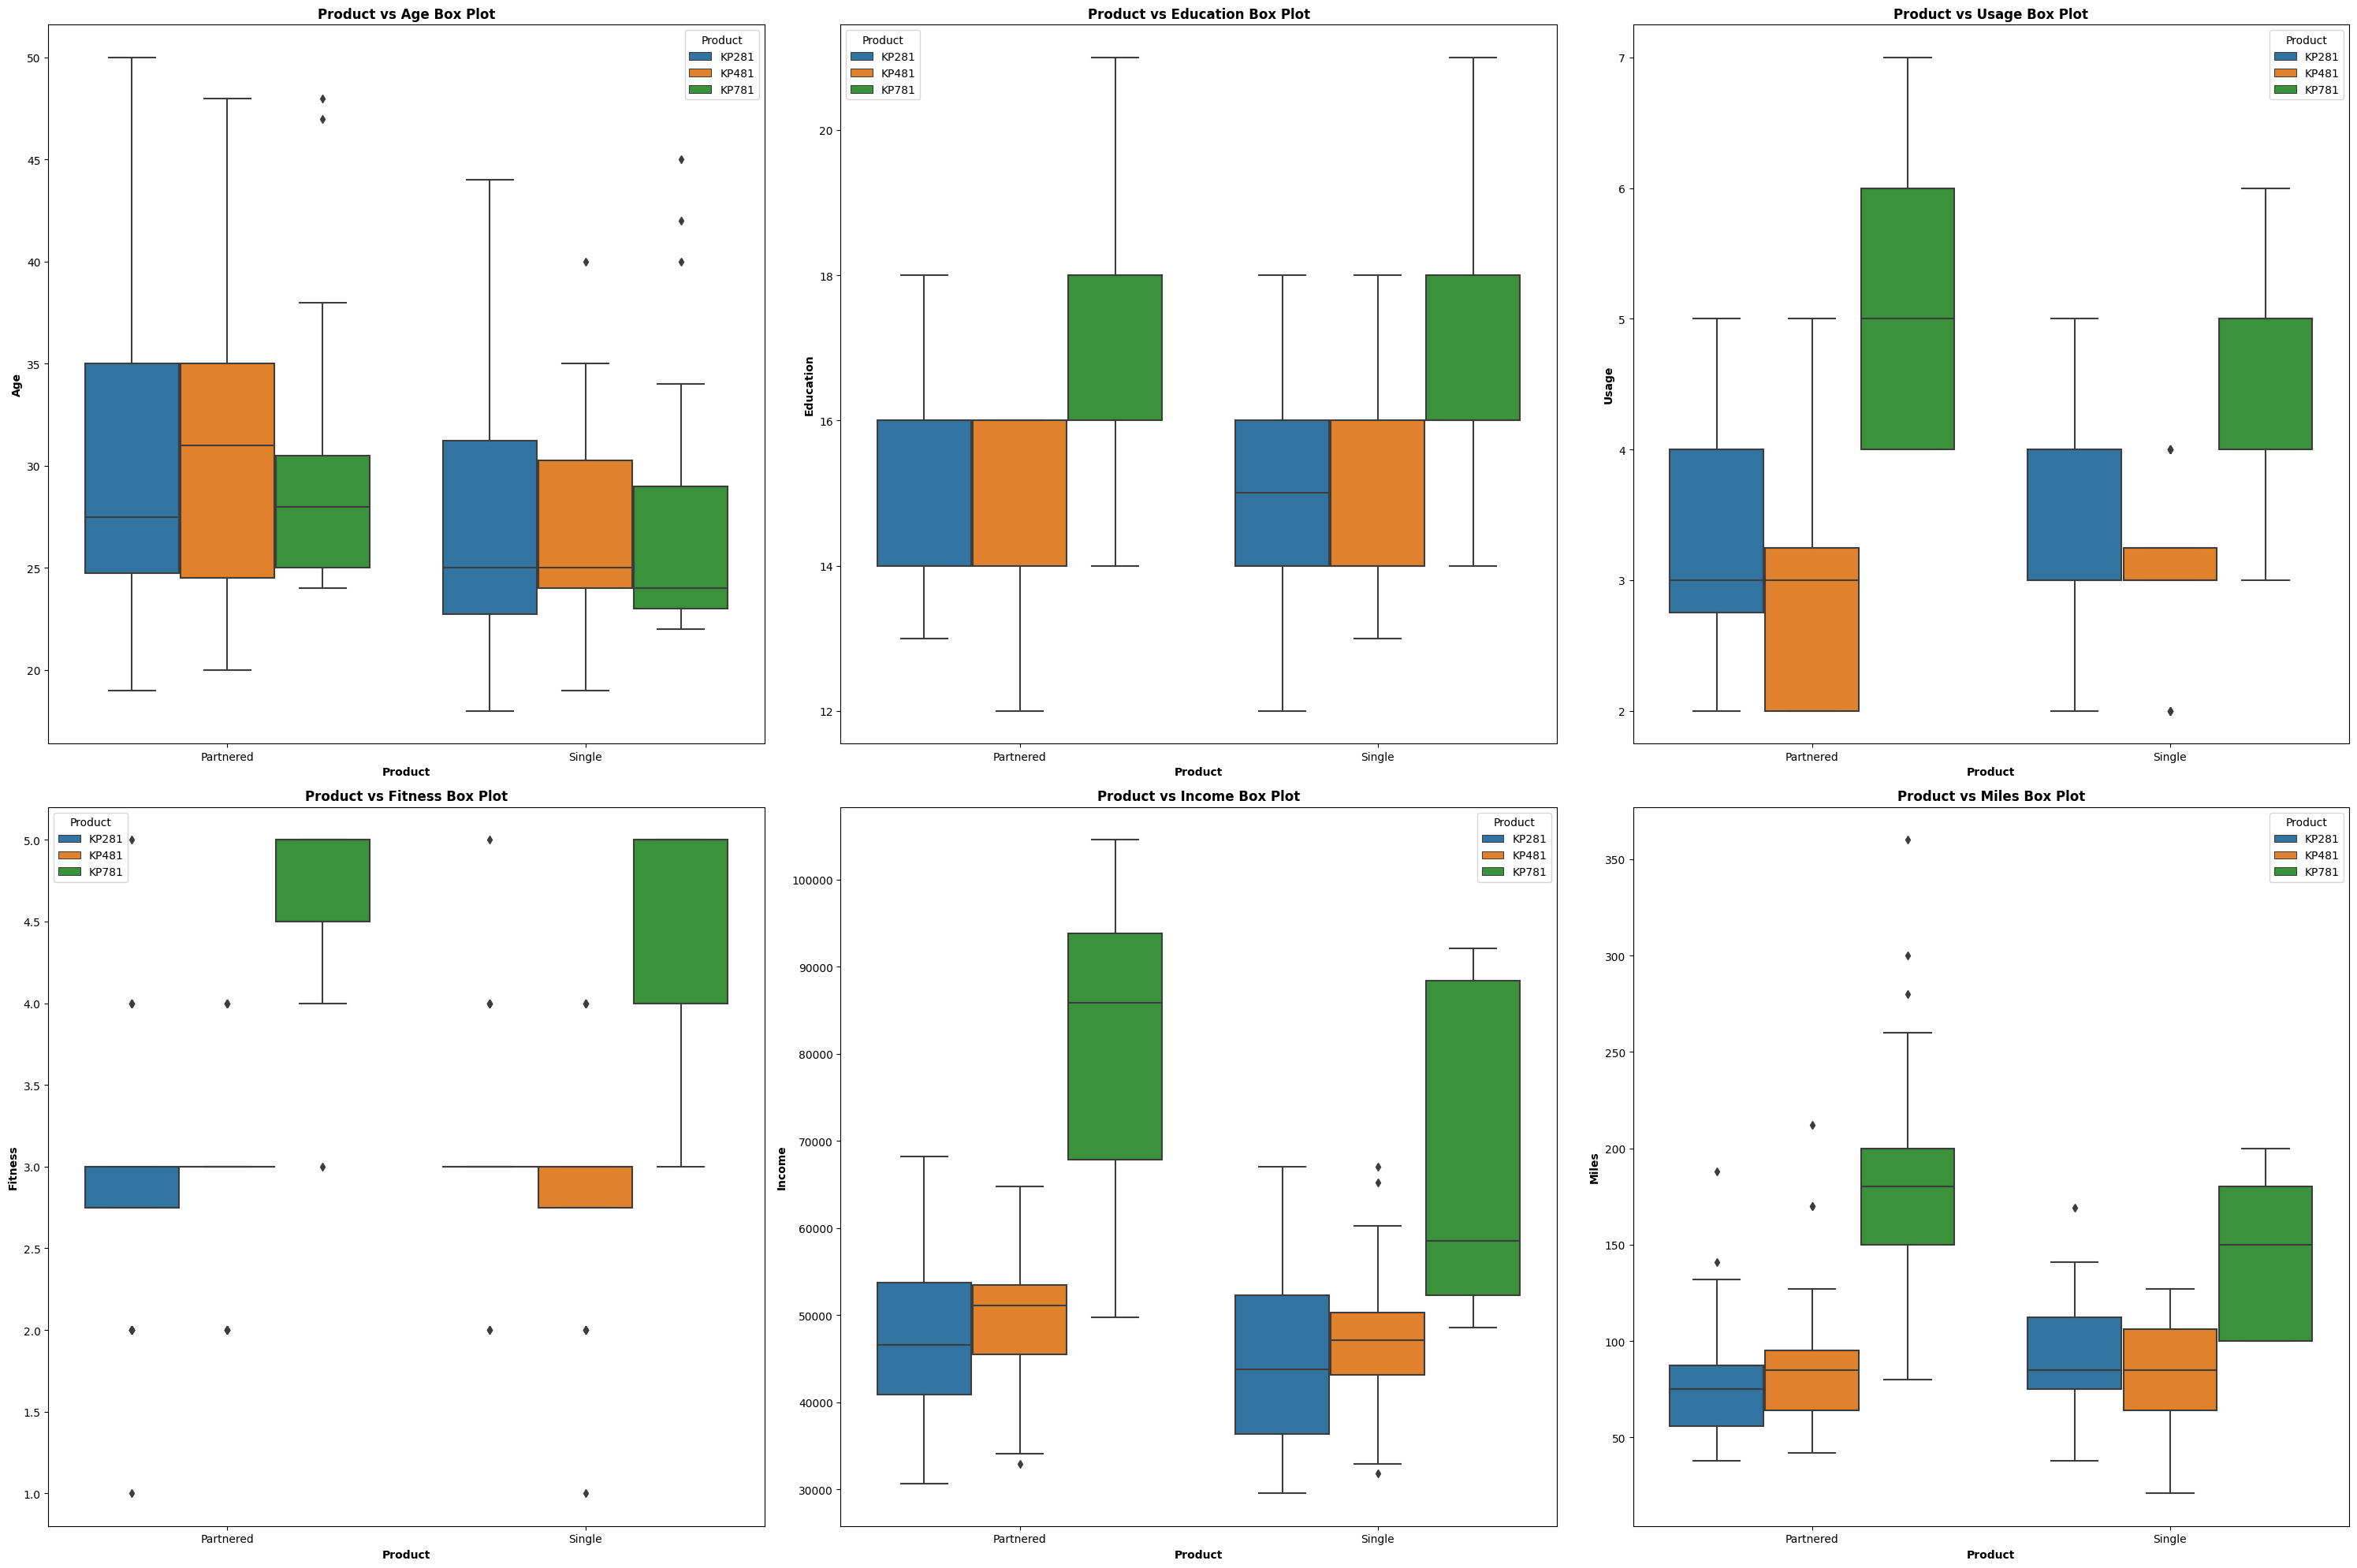

In [28]:
plt.clf()

fig, axes = plt.subplots(2, 3, figsize=(30, 20))
axes = axes.flatten()

for i, var in enumerate(numeric_columns):
    sns.boxplot(data_df, x='MaritalStatus', hue='Product', y=var, ax=axes[i])
    axes[i].set_title('Product vs ' + var + ' Box Plot', fontweight='bold')
    axes[i].set_xlabel('Product', fontweight='bold')
    axes[i].set_ylabel(var, fontweight='bold')

plt.tight_layout()
plt.show()

**Observations**
* Partnered customers planning on 2-3 uses per week favor KP481

## Correlation Analysis

In [29]:
data_df[numeric_columns].cov()

,Age,Education,Usage,Fitness,Income,Miles
Age,48.212166,3.149410,0.113470,0.406828,5.884446e+04,13.186530
Education,3.149410,2.614867,0.693172,0.636623,1.670472e+04,25.770795
Usage,0.113470,0.693172,1.176785,0.695469,9.303043e+03,42.709808
Fitness,0.406828,0.636623,0.695469,0.919429,8.467925e+03,39.073246
Income,58844.463439,16704.717815,9303.042582,8467.925388,2.724706e+08,465265.361887
Miles,13.186530,25.770795,42.709808,39.073246,4.652654e+05,2689.833489


In [30]:
data_df_corr = data_df[numeric_columns].corr()
data_df_corr

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


<Figure size 640x480 with 0 Axes>

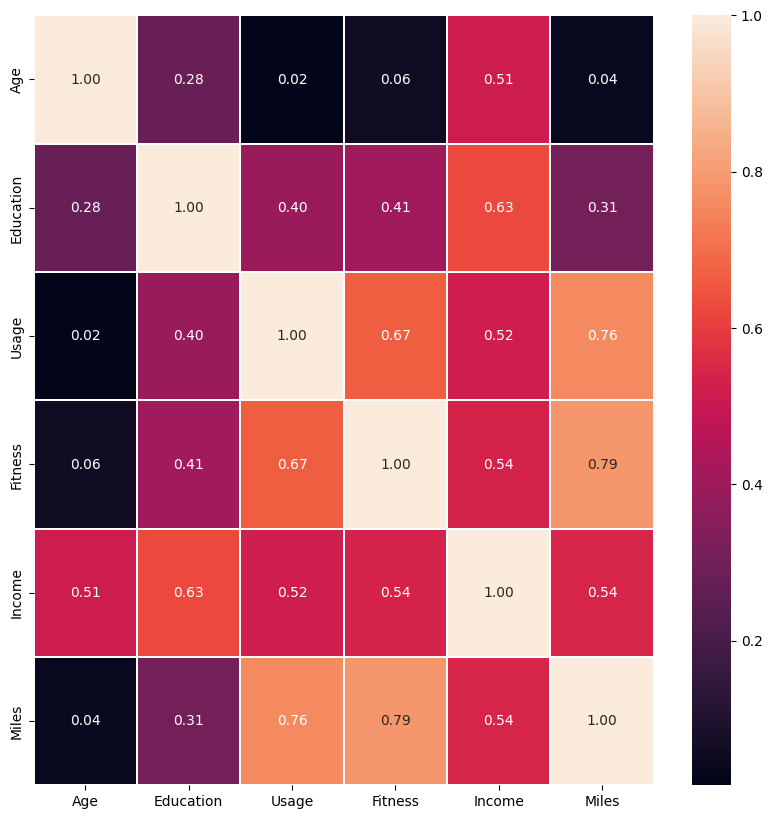

In [31]:
plt.clf()
fig, axes = plt.subplots(figsize=(10, 10))

sns.heatmap(data_df_corr, ax=axes, annot=True, linewidths=.05, fmt='0.2f')
plt.show()

**Observations**
* High Correlation Pairs
    * Miles and Fitness (.79)
    * Miles and Usage (.76)
* Moderate Correlation
    * Income and Education (.63)
    * Fitness and Usage (.67)
* Low / No Correlation
    * Usage and Age (.02)
    * Fitness and Age (.06)
    * Miles and Age (.04)

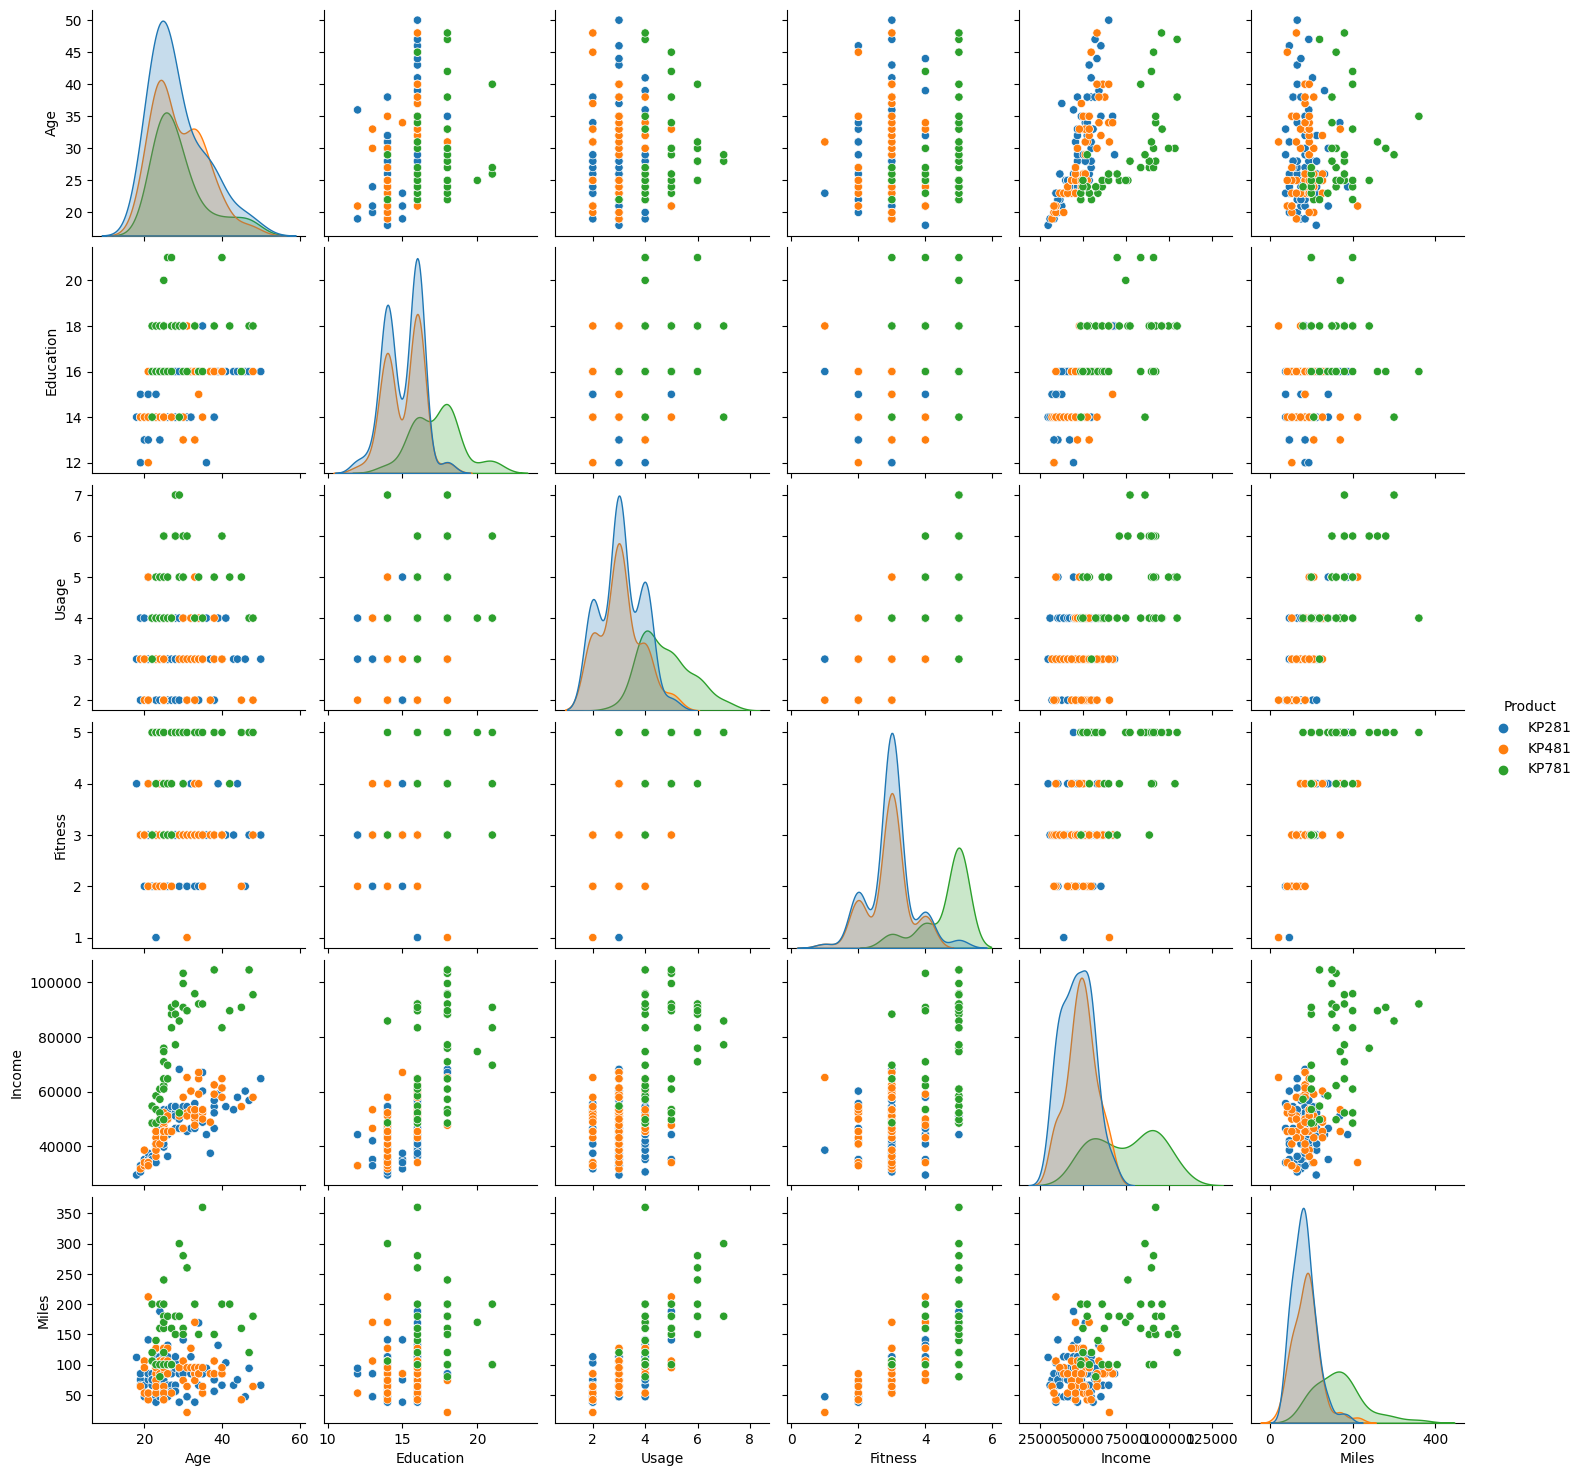

In [32]:
sns.pairplot(data_df, hue='Product')
plt.show()

**Observations**
* KP781 is favored in a younger, higher income demographic
* Mileage and Age cluster evenly below 200 weekly, but over 200 weekly are below 40 yr old using KP781

# Marginal and Conditional Analysis

## Question: Category Splits for purchases

In [33]:
#Percentage Breakdowns of Categorical Columns

#Note: This was a new trick for me, thanks for the assist belongs to StrataScratch
data_df_new = data_df[['Product', 'Gender', 'MaritalStatus']].melt()
data_df_new
(data_df_new.groupby(['variable', 'value'])[['value']].count() / len(data_df)).mul(100).round(3).astype(str) + '%'

value
variable      value             
Gender        Female     42.222%
              Male       57.778%
MaritalStatus Partnered  59.444%
              Single     40.556%
Product       KP281      44.444%
              KP481      33.333%
              KP781      22.222%

**Observations**
* Gender
    * 57.78% of customers are Male
* Marital Status
    * 59.44% of customers are Partnered
* Product
    * KP281 is highest seller at 44.44%
    * KP781 is lowest seller at 22.22%

## Question: Product vs Gender %s

In [39]:
#Using a crosstab and applying lambda function for percentages by column
#Normalize= index/columns also works for this, but not as easy control of format of result

pd.crosstab(index=data_df.Gender, columns=data_df.Product).apply(lambda x: (x/x.sum()*100).round(2), axis=0)

Product,KP281,KP481,KP781
Gender,,,
Female,50.0,48.33,17.5
Male,50.0,51.67,82.5


**Observations**
* KP281 split 50/50 Male to Female buyers
* KP481 shows small increment higher for Male customers
* KP781 is predominantly (82.5%) purchased by Male customers

## Question: Marital Status vs Product %s

In [40]:
#Using a crosstab and applying lambda function for percentages by column
#Normalize= index/columns also works for this, but not as easy control of format of result

pd.crosstab(index=data_df.MaritalStatus, columns=data_df.Product).apply(lambda x: (x/x.sum()*100).round(2), axis=0)

Product,KP281,KP481,KP781
MaritalStatus,,,
Partnered,60.0,60.0,57.5
Single,40.0,40.0,42.5


**Observations**
* For KP281 and KP481, customer is 50% more likely to be Partnered
* Effect is slightly less so for KP781 (by 2.5%), but it is clear that Partnered customers are more likely for all 3 models

## Question: Preferred Product Per Gender

In [43]:
#Using a crosstab and applying lambda function for percentages by column
#Normalize= index/columns also works for this, but not as easy control of format of result

pd.crosstab(index=data_df.Product, columns=data_df.Gender).apply(lambda x: (x/x.sum()*100).round(2), axis=0)

Gender,Female,Male
Product,,
KP281,52.63,38.46
KP481,38.16,29.81
KP781,9.21,31.73


**Observations**
* Female buyers prefer KP281 and show limited interest in KP781

## Question: KP281 vs Female Customers

In [48]:
product_gender = pd.crosstab(index=data_df.Product, columns=data_df.Gender, margins=True)
product_gender

#Bayes Theorom
#P(A|B) = P(A,B)/P(B) as long as P(B) != 0
#P(Female|KP281) = P(Female, KP281)/P(KP281)

prob_perc = (product_gender['Female']['KP281'] / product_gender['All']['KP281'] * 100).round(2)
prob_perc

50.0

**Observations**
* Purchasers of KP781 have a 50% chance of being Female

## Question: Age Groups Review

In [52]:
#Age min is 18 and max is 50 (earlier describe statement)
#AgeGroup - 13-20, 20-30, 30-40, 40-55
#AgeCategory - Teens, 20s, 30s, 40+

data_df_age = data_df.copy()

bins = [13,20,30,40,55]
labels = ['Teens', '20s', '30s', '40s+']
data_df_age['AgeGroup'] = pd.cut(data_df_age.Age, bins)
data_df_age['AgeCategory'] = pd.cut(data_df_age.Age, bins, labels=labels)
data_df_age.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,AgeGroup,AgeCategory
0,KP281,18,Male,14,Single,3,4,29562,112,"(13, 20]",Teens
1,KP281,19,Male,15,Single,2,3,31836,75,"(13, 20]",Teens
2,KP281,19,Female,14,Partnered,4,3,30699,66,"(13, 20]",Teens
3,KP281,19,Male,12,Single,3,3,32973,85,"(13, 20]",Teens
4,KP281,20,Male,13,Partnered,4,2,35247,47,"(13, 20]",Teens


In [53]:
prod_age = pd.crosstab(index=data_df_age.Product, columns=data_df_age.AgeCategory, margins=True)
prod_age

AgeCategory,Teens,20s,30s,40s+,All
Product,,,,,
KP281,6,49,19,6,80
KP481,4,31,23,2,60
KP781,0,30,6,4,40
All,10,110,48,12,180


In [55]:
#Percentage of purchases completed by 20s segment
prob_perc = (prod_age['20s']['All'] / prod_age['All']['All'] * 100).round(2)
prob_perc

61.11

In [81]:
#Percentage of purchases completed by 20s and 30s segment
prob_perc = ((prod_age['20s']['All'] + prod_age['30s']['All']) / prod_age['All']['All'] * 100).round(2)
prob_perc

87.78

**Observations**
* Teens and 20s segment show preference to KP281
* 20s segment make up majority of purchases at 61%

## Income Groups Review

In [62]:
#income min is 29562 and max is 104581
#IncomeGroup - 29k, 35k, 60k, 85k, 105k
#IncomeCategory - Low Income, Lower-middle Income, Upper-Middle Income and High Income

data_df_income = data_df.copy()

bins = [29000, 35000, 60000, 85000, 105000]
labels = ['Low Income','Lower-middle Income','Upper-Middle Income', 'High Income']
data_df_income['IncomeGroup'] = pd.cut(data_df_income.Income, bins)
data_df_income['IncomeCategory'] = pd.cut(data_df_income.Income, bins, labels=labels)

data_df_income.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,IncomeGroup,IncomeCategory
0,KP281,18,Male,14,Single,3,4,29562,112,"(29000, 35000]",Low Income
1,KP281,19,Male,15,Single,2,3,31836,75,"(29000, 35000]",Low Income
2,KP281,19,Female,14,Partnered,4,3,30699,66,"(29000, 35000]",Low Income
3,KP281,19,Male,12,Single,3,3,32973,85,"(29000, 35000]",Low Income
4,KP281,20,Male,13,Partnered,4,2,35247,47,"(35000, 60000]",Lower-middle Income


In [63]:
prod_income = pd.crosstab(index=data_df_income.Product, columns=data_df_income.IncomeCategory, margins=True)
prod_income

IncomeCategory,Low Income,Lower-middle Income,Upper-Middle Income,High Income,All
Product,,,,,
KP281,8,66,6,0,80
KP481,6,47,7,0,60
KP781,0,11,12,17,40
All,14,124,25,17,180


In [80]:
#Percentage of low-income customers purchasing any treadmill
prob_perc = (prod_income['Low Income']['All'] / prod_income['All']['All'] * 100).round(2)
print(f'Percentage of low income customers purchasing any bike: {prob_perc}%')

#Probability of high-income customers purchasing any treadmill
prob_perc = (prod_income['High Income']['All'] / prod_income['All']['All'] * 100).round(2)
print(f'\nPercentage of high income customers purchasing any bike: {prob_perc}%')

#Percentage of high-income customers purchasing KP781
prob_perc = (prod_income['High Income']['KP781'] / prod_income['All']['KP781'] * 100).round(2)
print(f'\nPercentage of high income customers purchasing KP781: {prob_perc}%')

#Lower Middle Income percentage of purchases
prob_perc = (prod_income['Lower-middle Income']['All'] / prod_income['All']['All'] * 100).round(2)
print(f'\nPercentage of lower-middle income customers: {prob_perc}%')

#Upper Middle Income percentage of purchases
prob_perc = (prod_income['Upper-Middle Income']['All'] / prod_income['All']['All'] * 100).round(2)
print(f'\nPercentage of upper-middle income customers: {prob_perc}%')

Percentage of low income customers purchasing any bike: 7.78%

Percentage of high income customers purchasing any bike: 9.44%

Percentage of high income customers purchasing KP781: 42.5%

Percentage of lower-middle income customers: 68.89%

Percentage of upper-middle income customers: 13.89%


**Observations**
* Lower income segment make up ~8% of buyers
* ~43% of high income customers purchase KP781 product

In [61]:
data_df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


## Question: Fitness vs Product

In [71]:
prod_fitness = pd.crosstab(index=data_df.Product, columns=data_df.Fitness, margins=True)
prod_fitness

Fitness,1,2,3,4,5,All
Product,,,,,,
KP281,1,14,54,9,2,80
KP481,1,12,39,8,0,60
KP781,0,0,4,7,29,40
All,2,26,97,24,31,180


In [76]:
#Percentage of customers with fitness level of 5
prob_perc = (prod_fitness[5]['All'] / prod_fitness['All']['All'] * 100).round(2)
print(f'Percentage of customers with fitness level of 5: {prob_perc}%')

#Percentage of customers with fitness level of 5 purchasing the KP781 treadmill
prob_perc = (prod_fitness[5]['KP781'] / prod_fitness['All']['All'] * 100).round(2)
print(f'\nPercentage of customers with fitness level of 5 purchasing KP781: {prob_perc}%')

#Percentage of customers with fitness level of 5 purchasing the KP781 treadmill given that Product is KP781
prob_perc = (prod_fitness[5]['KP781'] / prod_fitness['All']['KP781'] * 100).round(2)
print(f'\nPercentage of customers with fitness level of 5 purchasing KP781 given Product is KP781: {prob_perc}%')

Percentage of customers with fitness level of 5: 17.22%

Percentage of customers with fitness level of 5 purchasing KP781: 16.11%

Percentage of customers with fitness level of 5 purchasing KP781 given Product is KP781: 72.5%


**Observations**
* Customers with fitness level 5 make up ~17% of group, but account for ~73% of KP781 purchases

# Insights and Recommendations

## Insights:
* Product KP281 is the **best-selling** with 44% of total purchases
* The majority (83%) of treadmill customers fall within Lower-middle and Upper-middle income brackets (35,000 to 85,000)
    * 68% of purchases come from Lower-middle Income customers (35,000 to 60,000)
* Customers aged 20 to 40 make up ~88% of purchases
* **Miles and Fitness** and **Miles and Usage** are highly correlated, meaning higher fitness levels are correlated with more treadmill use
* KP781 stands out as the only model purchased by customers with Education above 20 years and Income over $70,000
* With Fitness Level 4 and 5, Customers tend to utilize the KP781 when averaging 200 Miles or more per week 

## Recommendations: